In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from google.colab import drive
drive.mount('/content/drive')
data_path =  r'./drive/My Drive/creditcard.csv'
df = pd.read_csv(data_path)

Mounted at /content/drive


In [ ]:
creditcard_df = pd.read_csv(data_path)

In [ ]:
unprocessed_df = creditcard_df

#**Dataset Description**
**Details**:-
The dataset comprises credit card transactions conducted by European cardholders in September 2013. This dataset comprises transactions that took place during a span of two days, with a total of 492 instances of fraud out of a total of 284,807 transactions.

The dataset comprises numerical input variables that have undergone a Principal Component Analysis (PCA) transformation. Some of the original characteristics are distance_from_home, distance_from_last_transaction, ratio_to_median_purchase_price, repeat_retailer, used_chip, used_pin_number, and online_order, which are transformed into variables using PCA. The principle components derived with PCA are denoted as V1, V2,... V28. The only characteristics that have not undergone PCA transformation are 'Time' and 'Amount'. Characteristic In the dataset, the variable 'Time' represents the duration in seconds between each transaction and the initial transaction. The 'Amount' feature represents the transaction amount and can be utilized for example-dependent cost-sensitive learning. Characteristic The response variable, denoted as 'Class', assumes a value of 1 when fraud is present and 0 when it is not.

The dataset exhibits a significant imbalance, with the positive class (defined as frauds) representing a mere 0.172% of the total transactions. There are total 284,807 records and 31 fields.

To solve this Imbalanced issue we will implement **SMOTE** algorithm to make the transaction baised. Dataset contains numerical input variables which are the result of a PCA transformation. In the original dataset we

**Source** - https://data.world/raghu543/credit-card-fraud-data

**Solving method**:-
The given problem statement is comes under binary classification
We have to solve problem using different machine learning algorithm as well as deep learning algorithms

**Limitations** - Due to confidentiality issues, the initial characteristics and additional contextual details of the data are converted into major components features V1, V2,... V28 using PCA.


In [ ]:
creditcard_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.759061e-12,-8.251130e-13,-9.654937e-13,8.321385e-13,1.649999e-13,4.248366e-13,-3.054600e-13,8.777971e-14,-1.179749e-12,...,-3.405756e-13,-5.723197e-13,-9.725856e-13,1.464150e-12,-6.987102e-13,-5.617874e-13,3.332082e-12,-3.518874e-12,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
creditcard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

All columns have either float or integer datatypes, indicating the absence of noise values such as **?** or **.**. If such values were present, the datatype would have been **object**.

Removing all the null values from the dataset and replacing those values with mean value of the column.

In [ ]:
for column in creditcard_df.columns:
    if creditcard_df[column].isna().sum() > 0:
        mean_value = creditcard_df[column].mean()
        creditcard_df[column].fillna(mean_value, inplace=True)

In [ ]:
creditcard_df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
class     0
dtype: int64

#**Multicollinearity check with VIF**

Multicollinearity occurs when there are two or more independent variables in a multiple regression model, which have a high correlation among themselves. When some features are highly correlated, we might have difficulty in distinguishing between their individual effects on the dependent variable. Multicollinearity can be detected using various techniques, one such technique being the Variance Inflation Factor(VIF).

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
X = creditcard_df[['Time','V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13','V14','V15','V16','V17','V18','V19','V20','V21','V22','V23','V24','V25','V26','V27','V28','Amount']]


vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

In [ ]:
print(vif_data)

   feature        VIF
0     Time   2.339084
1       V1   1.621694
2       V2   3.869377
3       V3   1.255585
4       V4   1.137944
5       V5   2.753075
6       V6   1.522122
7       V7   2.510165
8       V8   1.097151
9       V9   1.018831
10     V10   1.115668
11     V11   1.028861
12     V12   1.011961
13     V13   1.003434
14     V14   1.026832
15     V15   1.014135
16     V16   1.000371
17     V17   1.004772
18     V18   1.006568
19     V19   1.037809
20     V20   2.233934
21     V21   1.100720
22     V22   1.082384
23     V23   1.149268
24     V24   1.000659
25     V25   1.013388
26     V26   1.000487
27     V27   1.008979
28     V28   1.001425
29  Amount  11.499791


In [ ]:
def plot_heatmap_of_correlation(df):
    corr = df.corr()
    plt.figure(figsize=(18, 10))
    heat = sns.heatmap(data=corr, annot=True)
    plt.title('Heatmap of Correlation')
    plt.show()

def plot_fraud_transaction_histogram(df):
    fraud = df[df['class'] == 1]
    plt.figure(figsize=(8, 6))
    sns.histplot(data=fraud, x='Amount', bins=65, kde=True)
    plt.title("Distribution of Fraud Transactions")
    plt.xlabel('Amount')
    plt.ylabel('Frequency')
    plt.show()

def plot_real_transaction_histogram(df):
    real = df[df['class'] == 0]
    plt.figure(figsize=(8, 6))
    sns.histplot(data=real, x='Amount', bins=65, kde=True)
    plt.title("Distribution of Real Transactions")
    plt.xlabel('Amount')
    plt.ylabel('Frequency')
    plt.show()

def plot_amount_distribution_for_transactions(df):
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='class', y='Amount', data=df)
    plt.title('Amount Distribution for Fraud and Real Transactions')
    plt.show()

def plot_transaction_time_distribution(df):
    plt.figure(figsize=(6, 4))
    plt.title('Distribution of Transactions with Respect to Time', fontsize=14)
    sns.distplot(df['Time'], bins=120)
    plt.show()

def plot_transaction_counts_by_hour(df):
    plt.figure(figsize=(10, 6))
    df['Hour'] = df['Time'] // 3600
    plt.title('Transaction Counts by Hour', fontsize=14)
    sns.countplot(x='Hour', hue='class', data=df)
    plt.xlabel('Hour of the Day')
    plt.ylabel('Transaction Count')
    plt.xticks(rotation=45)
    plt.show()

def plot_transaction_counts_by_day(df):
    plt.figure(figsize=(10, 6))
    df['Day'] = 1
    df.loc[df['Time'] >= 25*3600, 'Day'] = 2
    plt.title('Transaction Counts by Day', fontsize=14)
    sns.countplot(x='Day', hue='class', data=df)
    plt.xlabel('Day')
    plt.ylabel('Transaction Count')
    plt.show()

def plot_transaction_amount_vs_time(df):
    plt.figure(figsize=(10, 6))
    plt.scatter(df[df['class'] == 0]['Time'], df[df['class'] == 0]['Amount'], label='Real', alpha=0.5, marker='o')
    plt.scatter(df[df['class'] == 1]['Time'], df[df['class'] == 1]['Amount'], label='Fraud', alpha=0.5, marker='x')
    plt.title('Transaction Amount vs Time')
    plt.xlabel('Time')
    plt.ylabel('Amount')
    plt.legend()
    plt.show()

def plot_transaction_amount_vs_features(df):
    features = ['V1', 'V2', 'V3', 'V4', 'V5']
    plt.figure(figsize=(14, 10))
    for i, feature in enumerate(features, start=1):
        plt.subplot(2, 3, i)
        sns.scatterplot(x=feature, y='Amount', hue='class', data=df, alpha=0.5)
        plt.title(f'Transaction Amount vs {feature}')
        plt.xlabel(feature)
        plt.ylabel('Amount')
    plt.tight_layout()
    plt.show()

def plot_class_distribution(df):
    class_counts = df['class'].value_counts()
    plt.figure(figsize=(8, 6))
    plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=140)
    plt.title('Transaction Class Distribution')
    plt.axis('equal')
    plt.show()

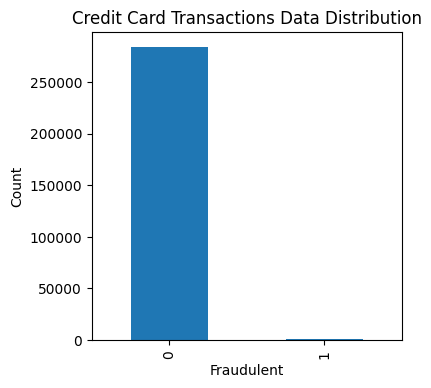

In [ ]:
# See distribution of target class
creditcard_df['class'].value_counts().plot.bar(figsize=(4,4), xlabel='Fraudulent', ylabel='Count', title='Credit Card Transactions Data Distribution')
plt.show()

In [ ]:
def dataset_analysis(df):
    fraud = df[df['class'] == 1]
    real = df[df['class'] == 0]

    percent_real = (len(real) / (len(real) + len(fraud))) * 100
    percent_fraud = (len(fraud) / (len(real) + len(fraud))) * 100

    print(f'Number of Real Transactions = {len(real)} and the Percentage of Real Transactions = {percent_real:.3f}%')
    print(f'Number of Fraud Transactions = {len(fraud)} and the Percentage of Fraud Transactions = {percent_fraud:.3f}%')

dataset_analysis(creditcard_df)


Number of Real Transactions = 284315 and the Percentage of Real Transactions = 99.827%
Number of Fraud Transactions = 492 and the Percentage of Fraud Transactions = 0.173%


In the below pie chart we are visually representing the distribution of transaction classes (real vs. fraud) in the dataset.

Pie chart Analysis  -

1. The pie chart visually shows the proportion of real transactions compared to fraudulent transactions in the dataset.
2. The larger portion of the pie represents real transactions, while the smaller portion represents fraudulent transactions.
3. Each slice of the pie is labeled with the corresponding class (real or fraud) and its percentage of the total number of transactions.

There are 284,315 real transactions, accounting for approximately 99.827% of the total.

There are 492 fraudulent transactions, accounting for approximately 0.173% of the total.

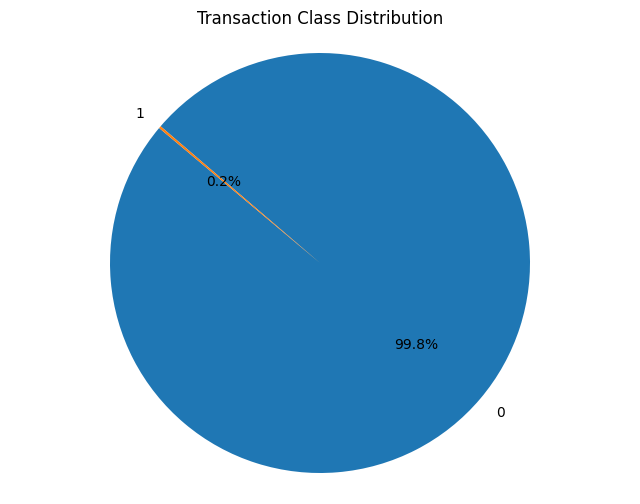

In [ ]:
plot_class_distribution(creditcard_df)

The below correlation matrix shows how each feature in the dataset correlates with every other feature.

1. It is useful for understanding the relationships between different features in a dataset.

2. A high positive correlation (close to 1) between two features indicates that they tend to increase or decrease together.

3. A high negative correlation (close to -1) indicates that as one feature increases, the other tends to decrease, and vice versa.

4. A correlation close to 0 suggests that there is little to no linear relationship between the features.

5. By analyzing the heatmap, you can identify patterns and dependencies between features, which can be helpful in feature selection, dimensionality reduction, and understanding the underlying structure of the data.

**From below plot, we can conclude that the features are not correlated.**


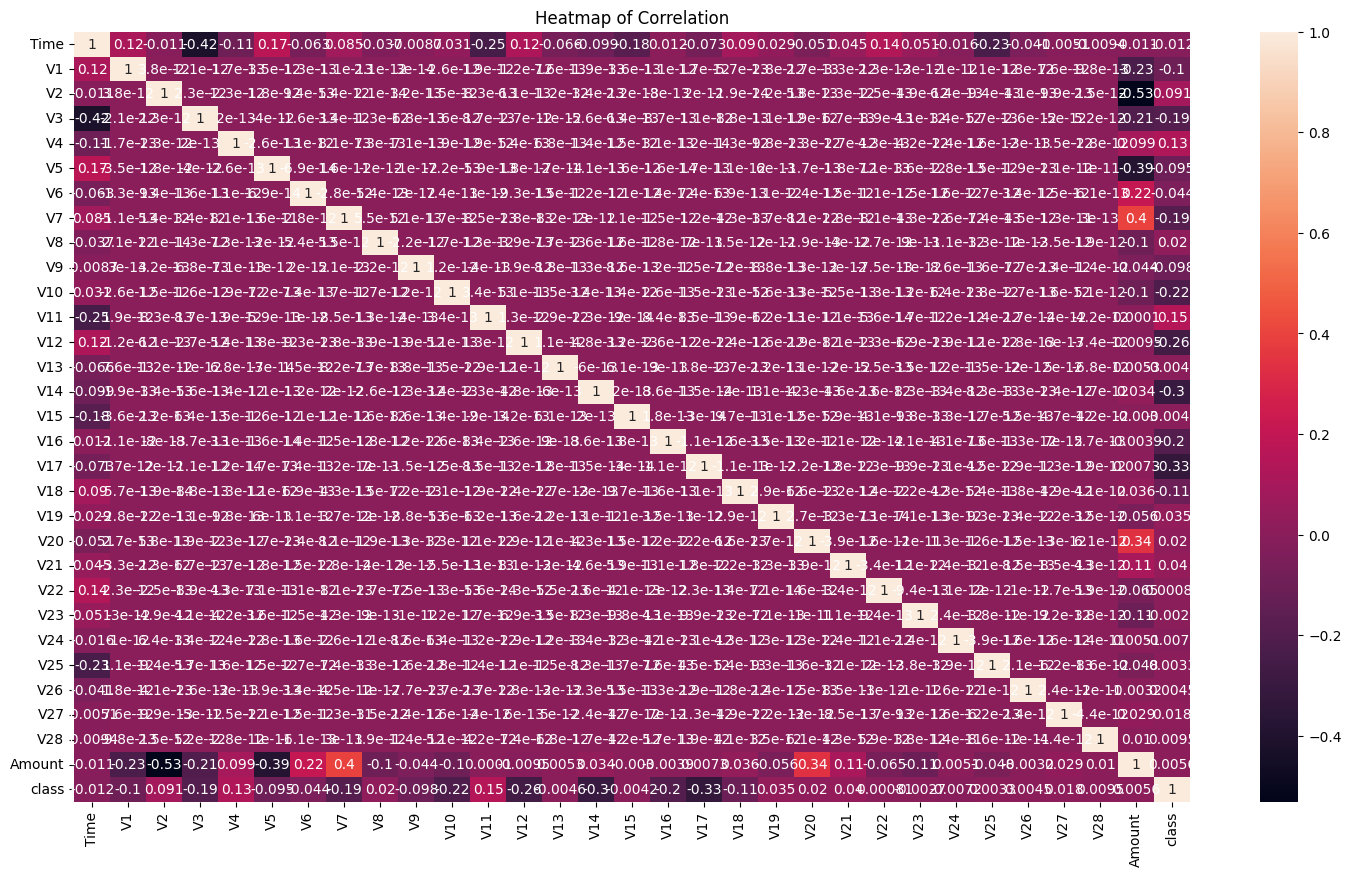

In [ ]:
# Plot heatmap of correlations
plot_heatmap_of_correlation(creditcard_df)

Below histograms provide a visual representation of the distribution of transaction amounts for both fraud and real transactions.

1. By comparing the two histograms, you can visually assess whether there are any noticeable differences in the distribution of transaction amounts between fraud and real transactions.

2. Understanding these differences can help in identifying potential patterns or anomalies associated with fraudulent transactions, such as unusually high or low transaction amounts.

3. This analysis can be valuable for developing fraud detection algorithms or understanding the characteristics of fraudulent transactions in the dataset.



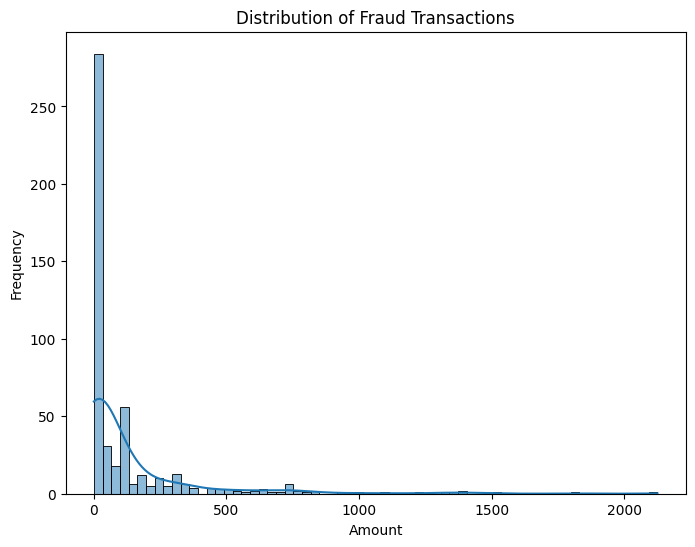

In [ ]:
plot_fraud_transaction_histogram(creditcard_df)

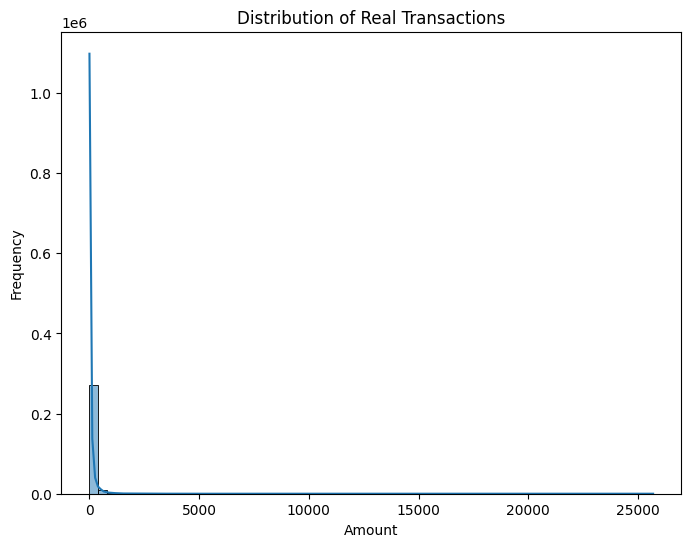

In [ ]:
plot_real_transaction_histogram(creditcard_df)

**Above Histogram plot result analysis**

In [ ]:
print("Fraud Transaction distribution:")
print(creditcard_df[creditcard_df['class'] == 1]['Amount'].value_counts().head())
print("\n")
print("Maximum amount of fraud transaction:", creditcard_df[creditcard_df['class'] == 1]['Amount'].max())
print("Minimum amount of fraud transaction:", creditcard_df[creditcard_df['class'] == 1]['Amount'].min())

Fraud Transaction distribution:
1.00     113
0.00      27
99.99     27
0.76      17
0.77      10
Name: Amount, dtype: int64


Maximum amount of fraud transaction: 2125.87
Minimum amount of fraud transaction: 0.0


The purpose of the below plot is to visualize and compare the distribution of transaction amounts between fraud and real transactions using a boxplot.

1. This plot helps in identifying any significant differences or patterns in the transaction amounts associated with fraudulent activities compared to legitimate transactions.

2. Moreover, Understanding these differences can aid in developing effective fraud detection strategies and models.

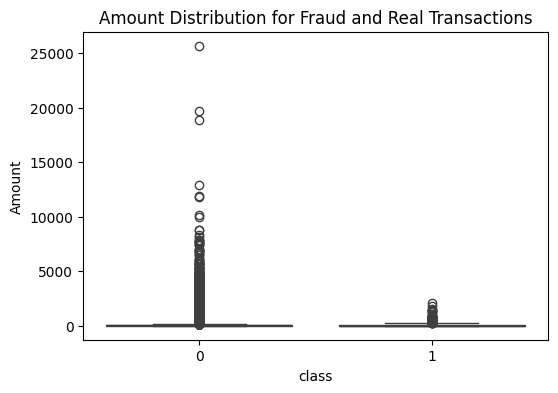

In [ ]:
plot_amount_distribution_for_transactions(creditcard_df)

Below plot is to visualize the distribution of transactions over time.

1. The histogram provides insights into the frequency or density of transactions occurring at different points in time.

2. Peaks in the histogram indicate periods of higher transaction activity, while valleys represent periods of lower activity.

3. By examining the shape and pattern of the histogram, you can identify any temporal trends or patterns in transaction activity.

Overall, plot helps in understanding the overall pattern of transaction activity, such as peak hours or periods of increased transaction volume.

<ipython-input-40-ad04cba562f0>:35: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Time'], bins=120)


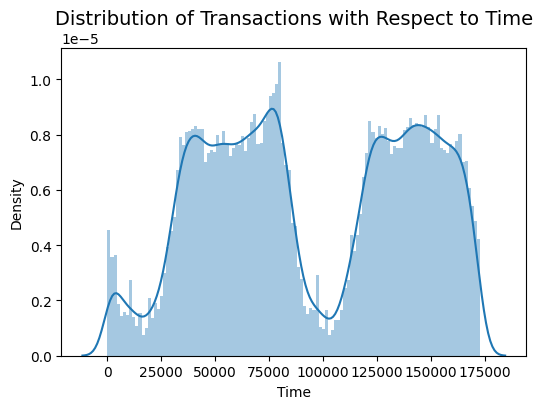

In [ ]:
plot_transaction_time_distribution(creditcard_df)

Below plot to visualize the distribution of transaction counts by hour of the day, categorized by transaction class (fraudulent vs. non-fraudulent).

1. The x-axis represents the hours of the day, while the y-axis represents the count of transactions.


2. The bars are color-coded based on the transaction class (fraudulent vs. non-fraudulent), allowing for easy comparison between the two classes.

3. By examining the plot, you can identify any patterns or trends in transaction counts throughout the day and observe if there are specific hours with higher or lower transaction activity.

Overall, plot helps in understanding the temporal patterns of transaction activity and identifying any anomalies or trends associated with specific hours.

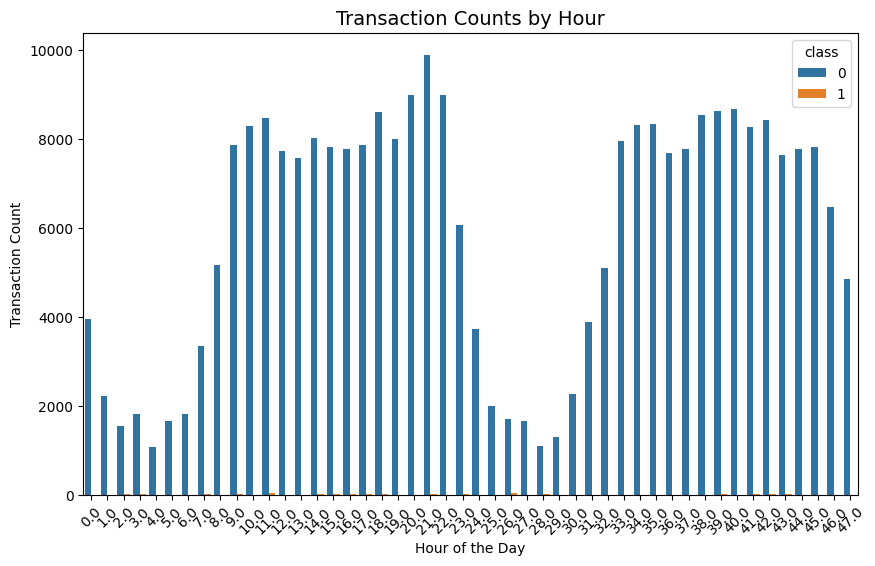

In [ ]:
plot_transaction_counts_by_hour(creditcard_df)

Below plot to visualize the distribution of transaction counts by day, categorized by transaction class (fraudulent vs. non-fraudulent)

1. The x-axis represents the days, while the y-axis represents the count of transactions.

2. The bars are color-coded based on the transaction class (fraudulent vs. non-fraudulent), allowing for easy comparison between the two classes.

3. By examining the plot, you can identify any patterns or trends in transaction counts throughout the days and observe if there are specific days with higher or lower transaction activity.

Overall, plot helps in understanding the temporal patterns of transaction activity and identifying any anomalies or trends associated with specific days.

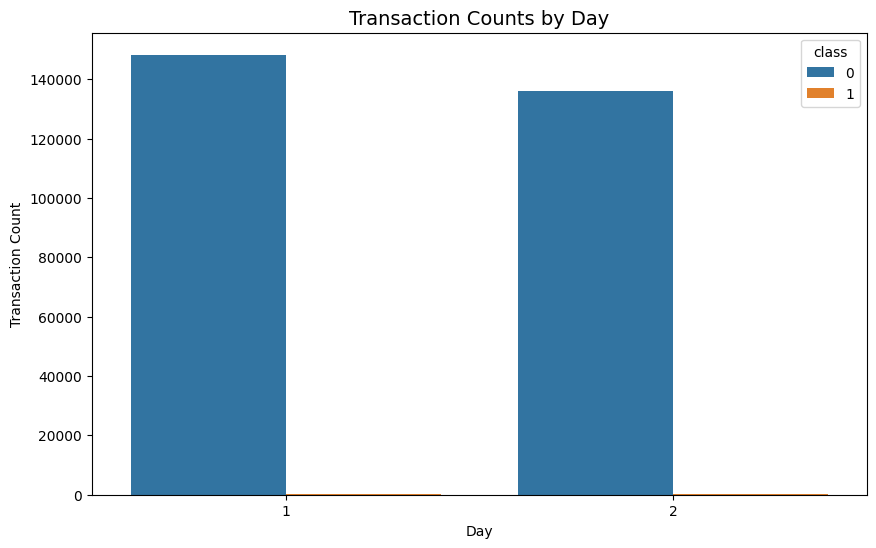

In [ ]:
plot_transaction_counts_by_day(creditcard_df)

Below code generates multiple scatter plots to visualize the relationship between transaction amounts and selected features (V1 to V5), categorized by transaction class (fraudulent vs. non-fraudulent).

1. Each scatter plot shows the relationship between transaction amounts ('Amount') and a specific feature (V1 to V5).

2. The x-axis represents the feature values, while the y-axis represents the transaction amounts.Points in the scatter plot represent individual transactions.

3. Each subplot is color-coded based on the transaction class (fraudulent vs. non-fraudulent), with different colors representing different classes.

4. By examining the scatter plots, you can observe how transaction amounts vary concerning different feature values for both fraud and non-fraud transactions. The scatter plots allow you to identify any clusters, outliers, or correlations between transaction amounts and the selected features.

Overall, the plot generated provides valuable insights into the relationship between transaction amounts and selected features, aiding in the analysis and detection of fraudulent transactions.

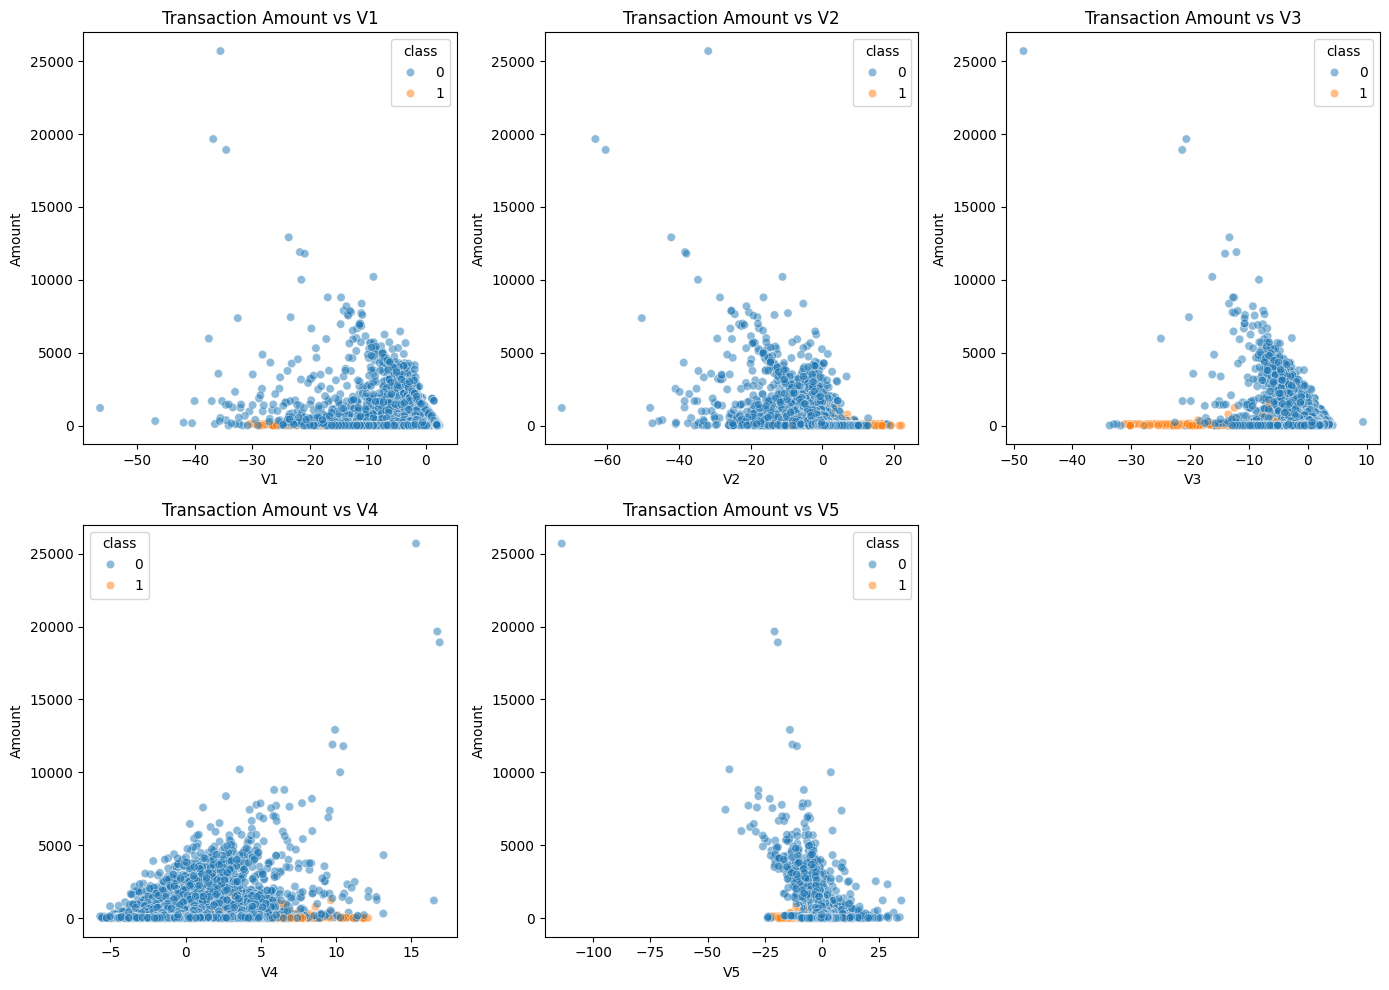

In [ ]:
plot_transaction_amount_vs_features(creditcard_df)

Class Imbalance

Whenever there is an issue with a classification problem and the classes are not represented equally, we say that the data is imbalanced. Applying classifiers to the dataset would most likely result in inaccurate predictions for every category. This was seen as a hurdle when attempting to learn from extremely Imbalanced data sets.


**SMOTE stands for "Synthetic Minority OverSampling Method."
In this method, synthesis new data from the minority class rather than  replicating existing data.**

SMOTE creates synthetic samples of the minority class by selecting similar instances and creating new synthetic examples along the line segments joining those instances in the feature space.

In [ ]:
    X = creditcard_df.drop('class', axis=1)
    y = creditcard_df['class']

    smote = SMOTE(random_state=42)

In [ ]:
    X_resampled, y_resampled = smote.fit_resample(X, y)

    balanced_df = X_resampled.copy()
    balanced_df['class'] = y_resampled

**Balanced dataframe after SMOTE**

In [ ]:
balanced_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


#**Dataset After Processing**

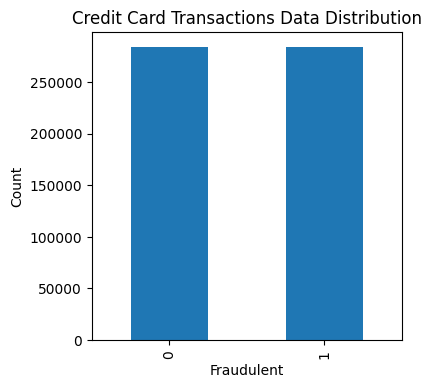

In [ ]:
# See distribution of target class
balanced_df['class'].value_counts().plot.bar(figsize=(4,4), xlabel='Fraudulent', ylabel='Count', title='Credit Card Transactions Data Distribution')
plt.show()

**Plots after balancing the datasets**

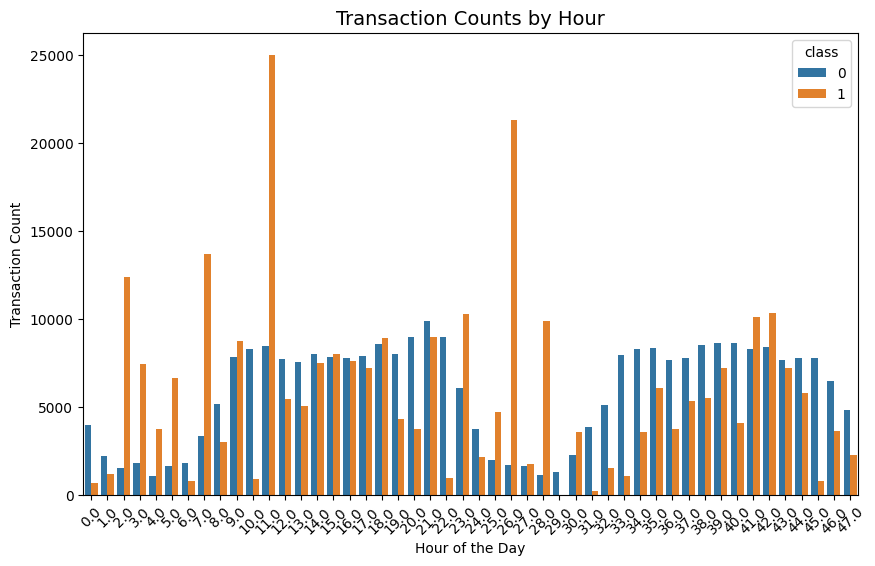

In [ ]:
plot_transaction_counts_by_hour(balanced_df)

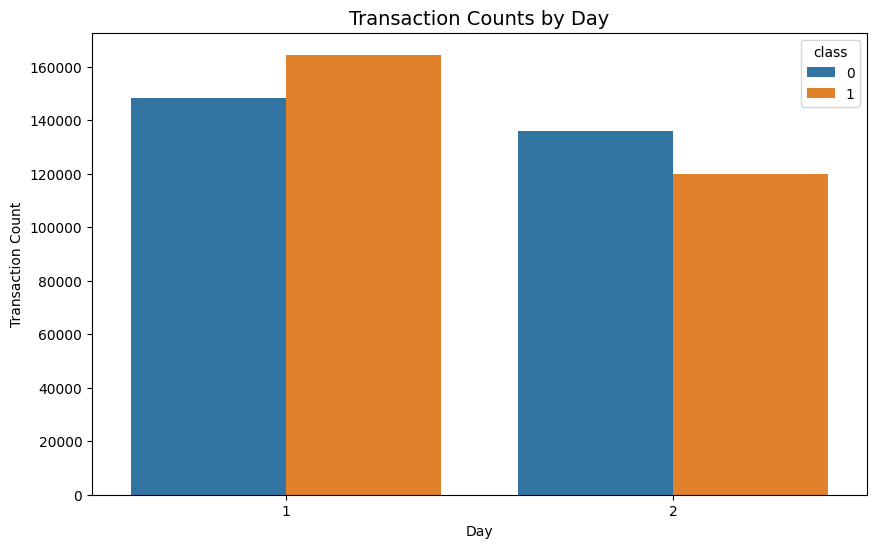

In [ ]:
plot_transaction_counts_by_day(balanced_df)

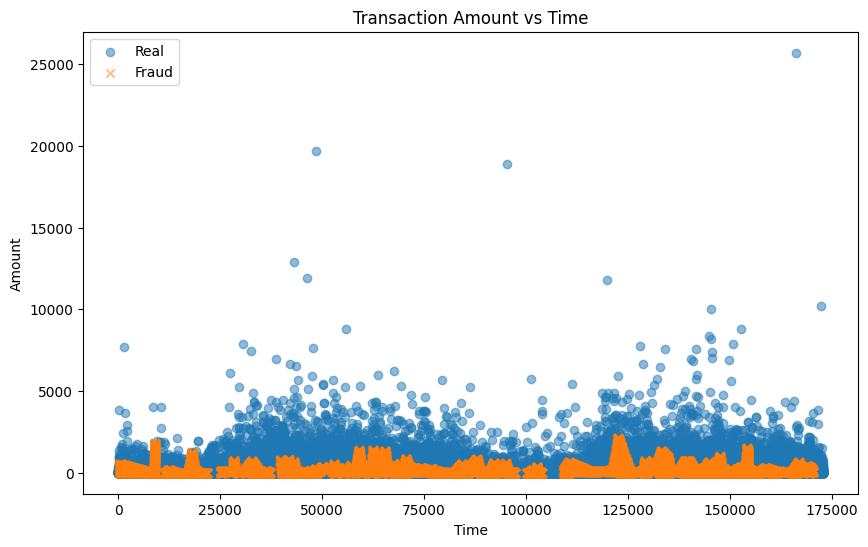

In [ ]:
plot_transaction_amount_vs_time(balanced_df)

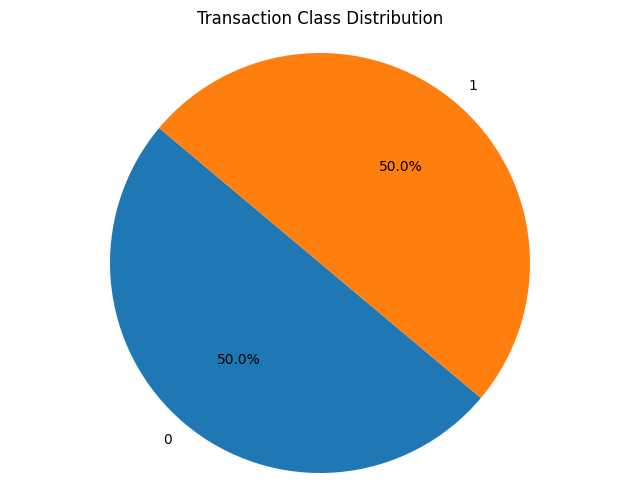

In [ ]:
plot_class_distribution(balanced_df)

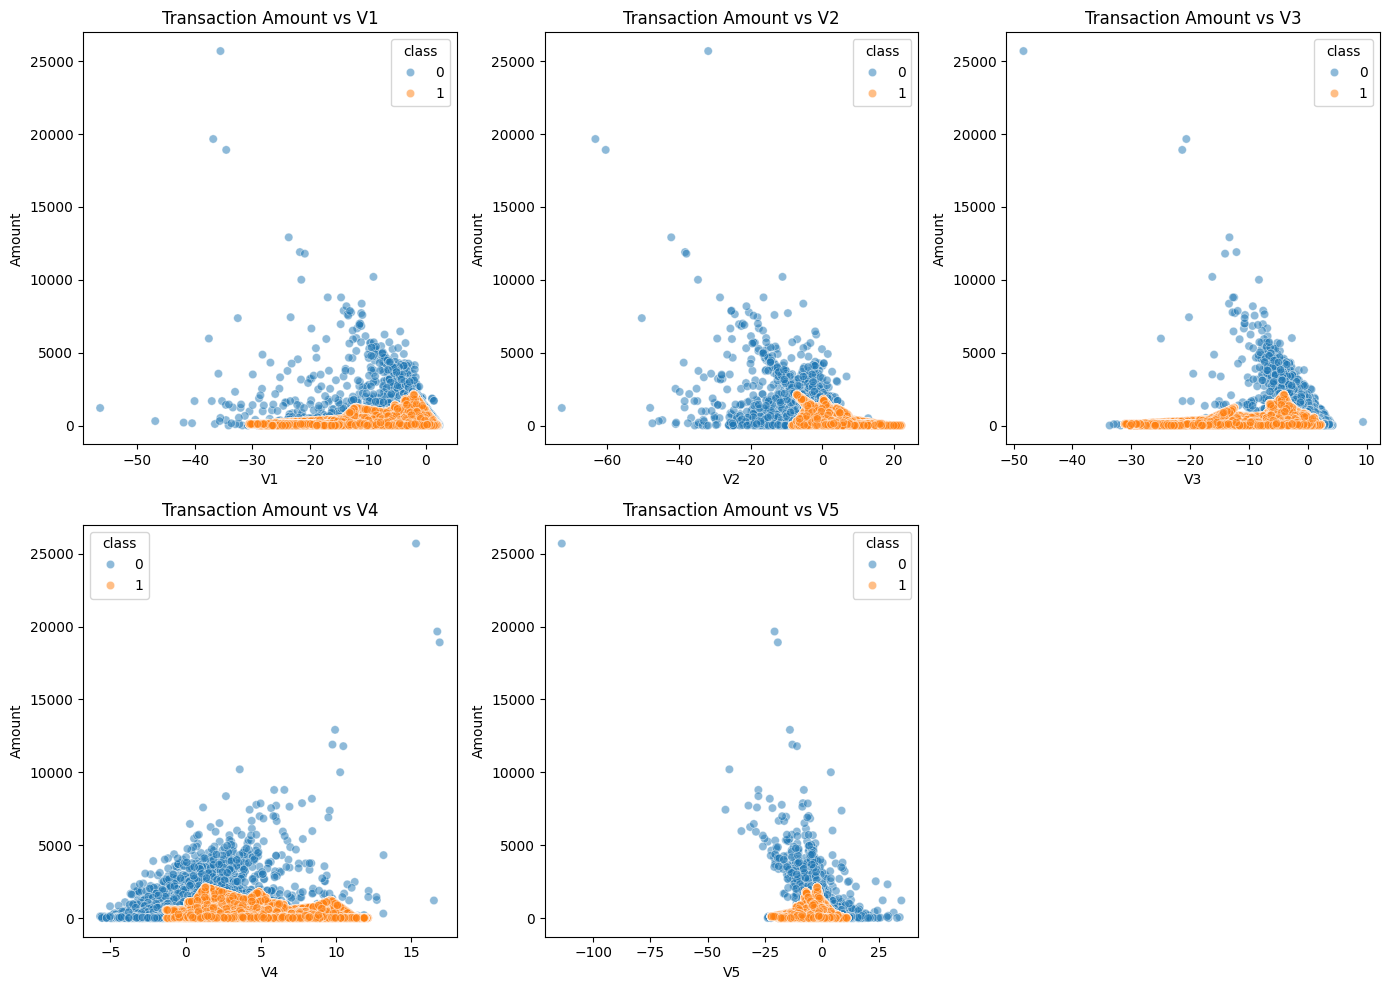

In [ ]:
plot_transaction_amount_vs_features(balanced_df)

#**Dataset before processing**

In [ ]:
creditcard_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


#**Dataset after processing**

In [ ]:
balanced_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,class
0,0.000000,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.620000,0
1,0.000000,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.690000,0
2,1.000000,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.660000,0
3,1.000000,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.500000,0
4,2.000000,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.990000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568625,144838.659385,-6.379157,1.672637,-5.885670,2.068340,-0.668576,-3.336450,-4.995823,2.632847,-2.275158,...,0.641337,-0.249308,-2.311290,-0.159402,1.190079,-0.258067,0.777265,-0.728919,7.334751,1
568626,65965.011763,-2.479028,0.958932,-1.782249,1.541783,-1.191990,-0.466794,-1.957161,0.312580,-0.433956,...,0.351983,0.208869,-0.235986,-0.404446,0.220454,0.685263,-0.890346,0.598736,74.507571,1
568627,34592.129093,-1.799894,2.368957,-2.673997,1.705968,-1.355923,-1.121788,-2.057832,-1.677459,-0.659287,...,1.473371,-0.581778,-0.013899,-0.144597,0.120315,0.242272,-0.121166,-0.534238,102.486823,1
568628,129683.002907,0.255234,2.432041,-5.388252,3.793925,-0.230814,-1.382725,-1.572929,0.748305,-1.600633,...,0.316760,-0.036858,0.182968,0.190701,-0.339250,-0.272824,0.315507,-0.091005,58.346854,1


#**Model Implmentation**

Implmented following 7 models on imbalanced data and balanced data achieved with the help of SMOTE algorithm.

1. Naive Bayes
2. Logistic Regression
3. Decision Tree
4. Random Forest
5. Long short-term memory (LSTM)
6. k-nearest neighbors (KNN)
7. Feedforward neural Network (FNN)


#**Imbalanced dataset**

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score,classification_report, precision_score, recall_score, roc_curve, auc
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.optimizers import Adam
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
X = creditcard_df.drop(columns=['class'])
y = creditcard_df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#**Naive Bayes**

In [ ]:
params = {'var_smoothing': np.logspace(0, -9, num=100)}
nb_classifier = GaussianNB()
grid_search = GridSearchCV(nb_classifier, params, cv=5, verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

best_nb_classifier = grid_search.best_estimator_

y_pred = best_nb_classifier.predict(X_test)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


Accuracy: 0.9986482216214319


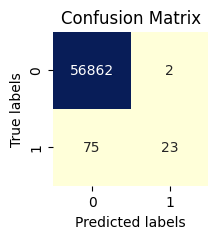

F1 Score: 0.37398373983739835
Precision: 0.92
Recall: 0.23469387755102042

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.92      0.23      0.37        98

    accuracy                           1.00     56962
   macro avg       0.96      0.62      0.69     56962
weighted avg       1.00      1.00      1.00     56962



In [ ]:
accuracy_NB = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_NB)

conf_matrix_NB = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(2, 2))
sns.heatmap(conf_matrix_NB, annot=True, cmap="YlGnBu", fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

f1_NB = f1_score(y_test, y_pred)
print("F1 Score:", f1_NB)

precision_NB = precision_score(y_test, y_pred)
print("Precision:", precision_NB)

recall_NB = recall_score(y_test, y_pred)
print("Recall:", recall_NB)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

ROC_AUC: 0.9453806001860509


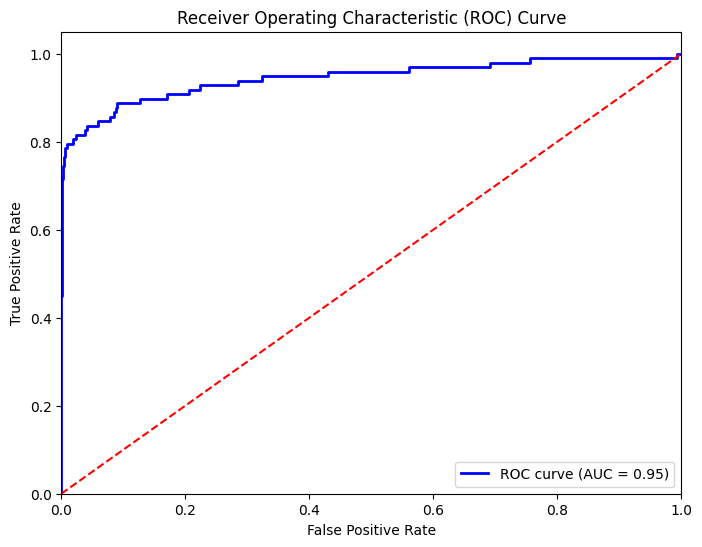

In [ ]:
y_prob = best_nb_classifier.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc_NB = auc(fpr, tpr)

print("ROC_AUC:", roc_auc_NB)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_NB)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

#**Logistic Regression**

In [ ]:
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100]
}

logreg = LogisticRegression()

grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

grid_search.fit(X_train, y_train)

best_logreg = grid_search.best_estimator_

y_pred = best_logreg.predict(X_test)

print("\nBest Hyperparameters:", grid_search.best_params_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solve


Best Hyperparameters: {'C': 0.1, 'penalty': 'l2'}


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.9986833327481479


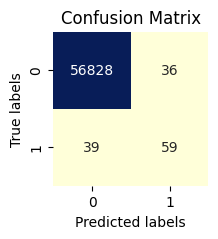

F1 Score: 0.6113989637305699
Precision: 0.6210526315789474
Recall: 0.6020408163265306

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.62      0.60      0.61        98

    accuracy                           1.00     56962
   macro avg       0.81      0.80      0.81     56962
weighted avg       1.00      1.00      1.00     56962



In [ ]:
accuracy_LR = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_LR)

conf_matrix_LR = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(2, 2))
sns.heatmap(conf_matrix_LR, annot=True, cmap="YlGnBu", fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

f1_LR = f1_score(y_test, y_pred)
print("F1 Score:", f1_LR)

precision_LR = precision_score(y_test, y_pred)
print("Precision:", precision_LR)

recall_LR = recall_score(y_test, y_pred)
print("Recall:", recall_LR)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

ROC_AUC: 0.9050803636029539


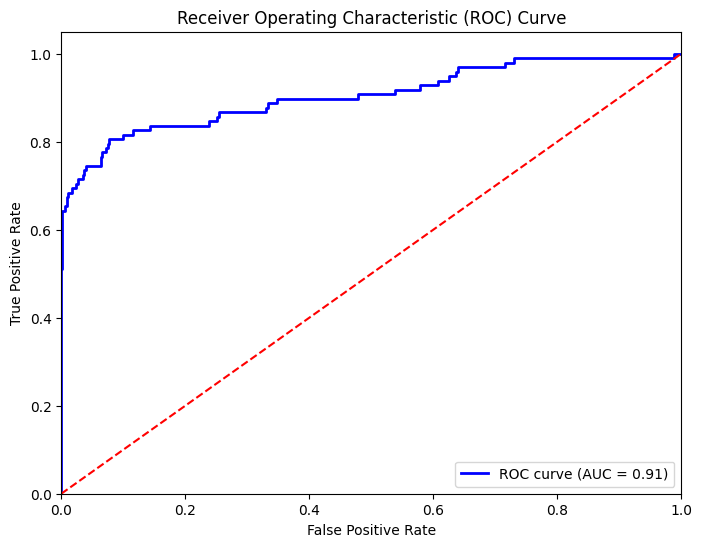

In [ ]:
y_prob = best_logreg.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc_LR = auc(fpr, tpr)

print("ROC_AUC:", roc_auc_LR)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_LR)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

#**Decision Tree**

In [ ]:
clf = DecisionTreeClassifier(max_depth=15, max_features='auto', criterion='entropy', random_state=42)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


Accuracy: 0.9990519995786665


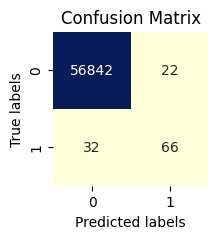

F1 Score: 0.7096774193548386
Precision: 0.75
Recall: 0.673469387755102

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.75      0.67      0.71        98

    accuracy                           1.00     56962
   macro avg       0.87      0.84      0.85     56962
weighted avg       1.00      1.00      1.00     56962



In [ ]:
accuracy_DT = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_DT)

conf_matrix_DT = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(2, 2))
sns.heatmap(conf_matrix_DT, annot=True, cmap="YlGnBu", fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

f1_DT = f1_score(y_test, y_pred)
print("F1 Score:", f1_DT)

precision_DT = precision_score(y_test, y_pred)
print("Precision:", precision_DT)

recall_DT = recall_score(y_test, y_pred)
print("Recall:", recall_DT)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

ROC_AUC: 0.8342387637384723


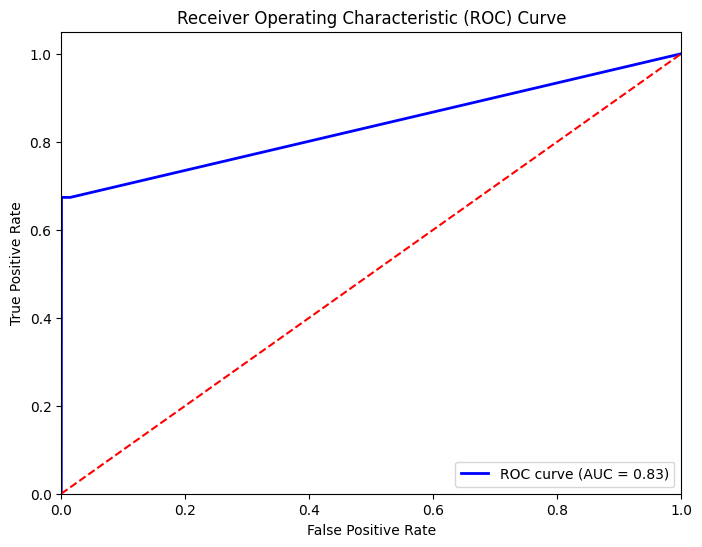

In [ ]:
y_prob = clf.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc_DT = auc(fpr, tpr)

print("ROC_AUC:", roc_auc_DT)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_DT)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

#**Random Forest**

In [ ]:
clf = RandomForestClassifier(n_estimators=50, random_state=42)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

Accuracy: 0.9995435553526912


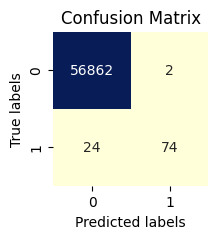

F1 Score: 0.8505747126436782
Precision: 0.9736842105263158
Recall: 0.7551020408163265

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.76      0.85        98

    accuracy                           1.00     56962
   macro avg       0.99      0.88      0.93     56962
weighted avg       1.00      1.00      1.00     56962



In [ ]:
accuracy_RF = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_RF)

conf_matrix_RF = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(2, 2))
sns.heatmap(conf_matrix_RF, annot=True, cmap="YlGnBu", fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

f1_RF = f1_score(y_test, y_pred)
print("F1 Score:", f1_RF)

precision_RF = precision_score(y_test, y_pred)
print("Precision:", precision_RF)

recall_RF = recall_score(y_test, y_pred)
print("Recall:", recall_RF)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

ROC_AUC: 0.9480902518576366


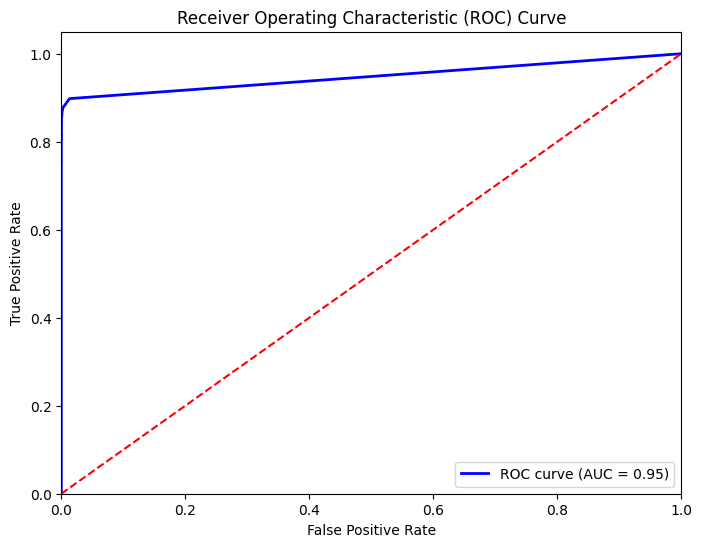

In [ ]:
y_prob = clf.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc_RF = auc(fpr, tpr)

print("ROC_AUC:", roc_auc_RF)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_RF)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

#**Long Short-Term Memory Networks (LSTM)**

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

timesteps = 1
X_train_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0], timesteps, X_train_scaled.shape[1])
X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], timesteps, X_test_scaled.shape[1])

model = Sequential()
model.add(LSTM(units=64, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(units=1, activation='sigmoid'))

optimizer = Adam(lr=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train_reshaped, y_train, epochs=10, batch_size=64, validation_split=0.2)


y_pred_proba = model.predict(X_test_reshaped)
y_pred = (y_pred_proba > 0.5).astype(int)

Epoch 1/10
2849/2849 [==============================] - 15s 4ms/step - loss: 0.0317 - accuracy: 0.9966 - val_loss: 0.0028 - val_accuracy: 0.9994
Epoch 2/10
2849/2849 [==============================] - 12s 4ms/step - loss: 0.0030 - accuracy: 0.9994 - val_loss: 0.0025 - val_accuracy: 0.9994
Epoch 3/10
2849/2849 [==============================] - 12s 4ms/step - loss: 0.0027 - accuracy: 0.9995 - val_loss: 0.0024 - val_accuracy: 0.9995
Epoch 4/10
2849/2849 [==============================] - 11s 4ms/step - loss: 0.0024 - accuracy: 0.9995 - val_loss: 0.0024 - val_accuracy: 0.9994
Epoch 5/10
2849/2849 [==============================] - 12s 4ms/step - loss: 0.0022 - accuracy: 0.9995 - val_loss: 0.0026 - val_accuracy: 0.9994
Epoch 6/10
2849/2849 [==============================] - 12s 4ms/step - loss: 0.0021 - accuracy: 0.9995 - val_loss: 0.0026 - val_accuracy: 0.9995
Epoch 7/10
2849/2849 [==============================] - 12s 4ms/step - loss: 0.0020 - accuracy: 0.9995 - val_loss: 0.0025 - val_ac

Accuracy: 0.999403110845827


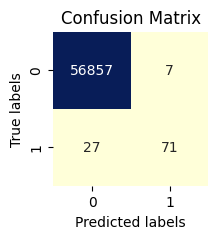

F1 Score: 0.8068181818181819
Precision: 0.9102564102564102
Recall: 0.7244897959183674

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.91      0.72      0.81        98

    accuracy                           1.00     56962
   macro avg       0.95      0.86      0.90     56962
weighted avg       1.00      1.00      1.00     56962



In [ ]:
accuracy_LSTM = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_LSTM)

conf_matrix_LSTM = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(2, 2))
sns.heatmap(conf_matrix_LSTM, annot=True, cmap="YlGnBu", fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

f1_LSTM = f1_score(y_test, y_pred)
print("F1 Score:", f1_LSTM)

precision_LSTM = precision_score(y_test, y_pred)
print("Precision:", precision_LSTM)

recall_LSTM = recall_score(y_test, y_pred)
print("Recall:", recall_LSTM)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

AUC-ROC: 0.9826097785765967


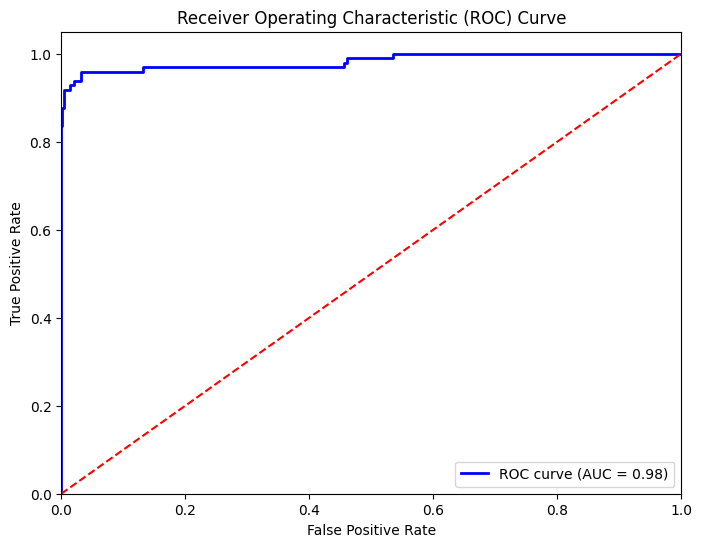

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculating AUC-ROC
roc_auc_LSTM = auc(fpr, tpr)
print("AUC-ROC:", roc_auc_LSTM)

# Plotting ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_LSTM)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

#**KNN**

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train_scaled, y_train)

y_pred = knn.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.9995259997893332

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.94      0.78      0.85        98

    accuracy                           1.00     56962
   macro avg       0.97      0.89      0.92     56962
weighted avg       1.00      1.00      1.00     56962



Accuracy: 0.9995259997893332


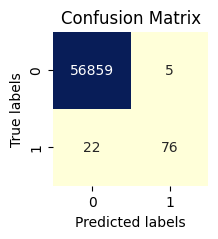

F1 Score: 0.8491620111731844
Precision: 0.9382716049382716
Recall: 0.7755102040816326

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.94      0.78      0.85        98

    accuracy                           1.00     56962
   macro avg       0.97      0.89      0.92     56962
weighted avg       1.00      1.00      1.00     56962



In [ ]:
accuracy_KNN = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_KNN)

conf_matrix_KNN = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(2, 2))
sns.heatmap(conf_matrix_KNN, annot=True, cmap="YlGnBu", fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

f1_KNN = f1_score(y_test, y_pred)
print("F1 Score:", f1_KNN)

precision_KNN = precision_score(y_test, y_pred)
print("Precision:", precision_KNN)

recall_KNN = recall_score(y_test, y_pred)
print("Recall:", recall_KNN)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

AUC-ROC: 0.9335599690776705


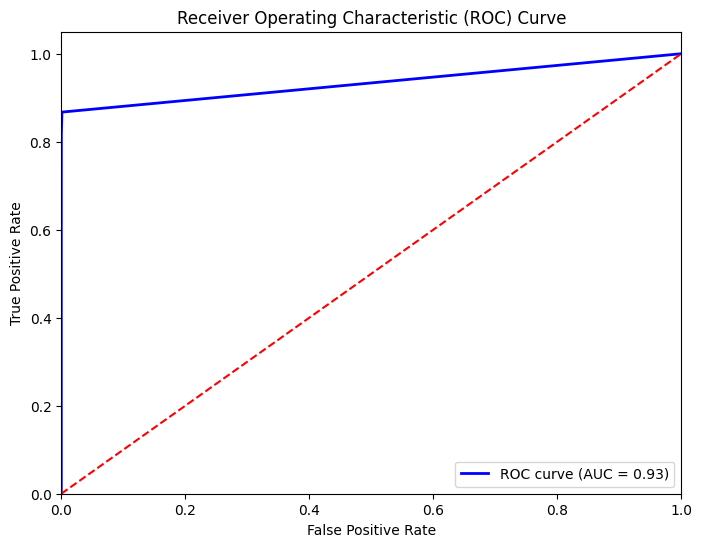

In [ ]:
y_pred_proba = knn.predict_proba(X_test_scaled)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

roc_auc_KNN = auc(fpr, tpr)
print("AUC-ROC:", roc_auc_KNN)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_KNN)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


#**FNN**

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Defining the FNN model
model = Sequential()
model.add(Dense(units=64, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

# Compiling the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Training the model
model.fit(X_train_scaled, y_train, epochs=10, batch_size=64, validation_split=0.2)

# Evaluating the model
y_pred_proba = model.predict(X_test_scaled)
y_pred = (y_pred_proba > 0.5).astype(int)

Epoch 1/10
2849/2849 [==============================] - 9s 3ms/step - loss: 0.0110 - accuracy: 0.9976 - val_loss: 0.0032 - val_accuracy: 0.9994
Epoch 2/10
2849/2849 [==============================] - 8s 3ms/step - loss: 0.0033 - accuracy: 0.9994 - val_loss: 0.0030 - val_accuracy: 0.9993
Epoch 3/10
2849/2849 [==============================] - 6s 2ms/step - loss: 0.0029 - accuracy: 0.9994 - val_loss: 0.0026 - val_accuracy: 0.9994
Epoch 4/10
2849/2849 [==============================] - 8s 3ms/step - loss: 0.0025 - accuracy: 0.9995 - val_loss: 0.0027 - val_accuracy: 0.9993
Epoch 5/10
2849/2849 [==============================] - 6s 2ms/step - loss: 0.0023 - accuracy: 0.9995 - val_loss: 0.0029 - val_accuracy: 0.9993
Epoch 6/10
2849/2849 [==============================] - 7s 3ms/step - loss: 0.0021 - accuracy: 0.9995 - val_loss: 0.0031 - val_accuracy: 0.9994
Epoch 7/10
2849/2849 [==============================] - 7s 2ms/step - loss: 0.0021 - accuracy: 0.9995 - val_loss: 0.0026 - val_accuracy:

Accuracy: 0.9994908886626171


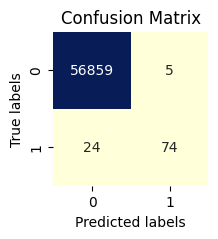

F1 Score: 0.8361581920903955
Precision: 0.9367088607594937
Recall: 0.7551020408163265

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.94      0.76      0.84        98

    accuracy                           1.00     56962
   macro avg       0.97      0.88      0.92     56962
weighted avg       1.00      1.00      1.00     56962



In [ ]:
accuracy_FNN = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_FNN)

conf_matrix_FNN = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(2, 2))
sns.heatmap(conf_matrix_FNN, annot=True, cmap="YlGnBu", fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

f1_FNN = f1_score(y_test, y_pred)
print("F1 Score:", f1_FNN)

precision_FNN = precision_score(y_test, y_pred)
print("Precision:", precision_FNN)

recall_FNN = recall_score(y_test, y_pred)
print("Recall:", recall_FNN)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

AUC-ROC: 0.9747706306777072


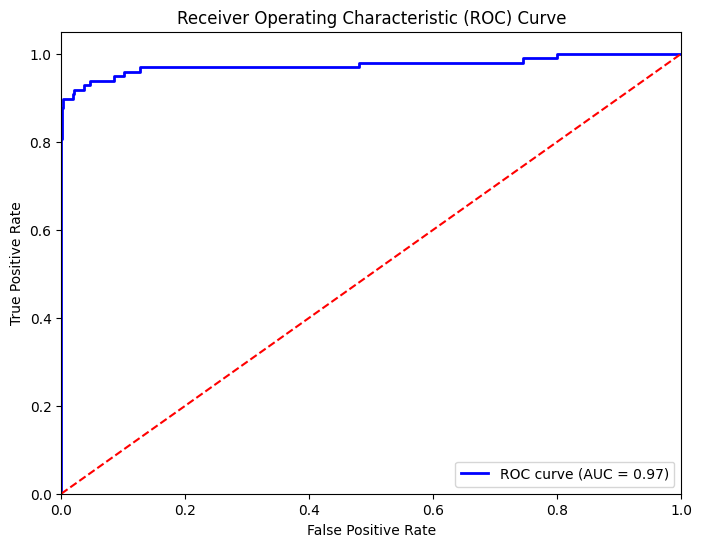

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculating AUC-ROC
roc_auc_FNN = auc(fpr, tpr)
print("AUC-ROC:", roc_auc_FNN)

# Plotting ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_FNN)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


#**Comparing Accuracy for all implemented models on Imbalanced dataset**

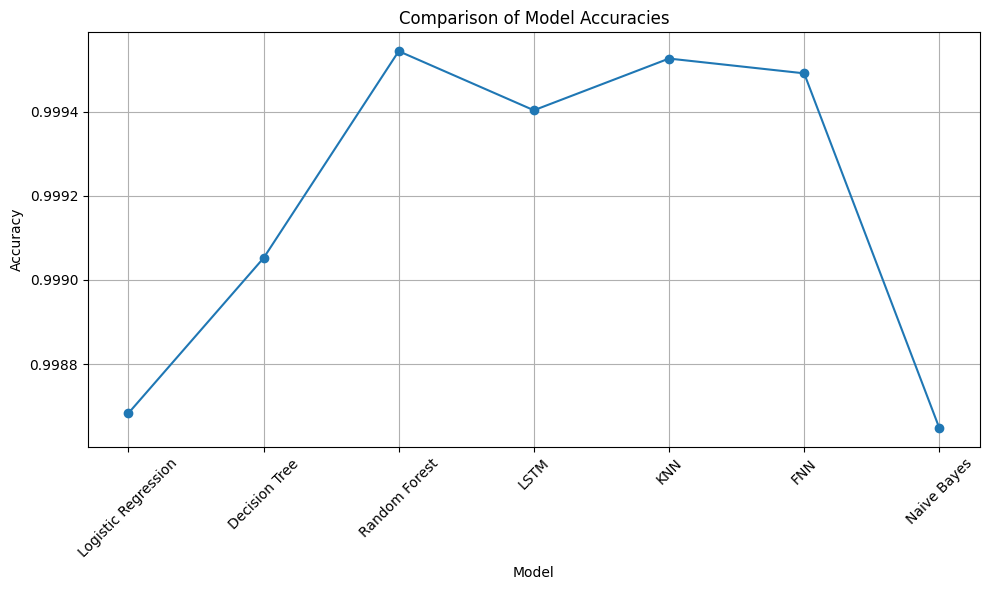

In [ ]:
import matplotlib.pyplot as plt

models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'LSTM', 'KNN', 'FNN', 'Naive Bayes']
accuracies = [accuracy_LR, accuracy_DT, accuracy_RF, accuracy_LSTM, accuracy_KNN, accuracy_FNN, accuracy_NB]

plt.figure(figsize=(10, 6))
plt.plot(models, accuracies, marker='o', linestyle='-')
plt.title('Comparison of Model Accuracies')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

#**Comparing F1 - Score for all implemented models on Imbalanced dataset**

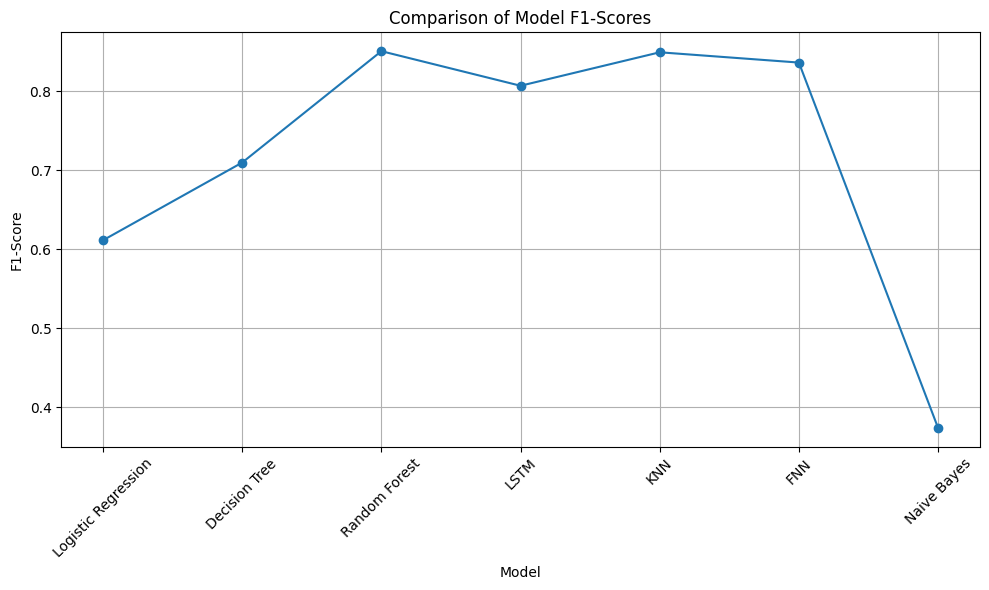

In [ ]:
import matplotlib.pyplot as plt

models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'LSTM', 'KNN', 'FNN', 'Naive Bayes']
accuracies = [f1_LR, f1_DT, f1_RF, f1_LSTM, f1_KNN, f1_FNN, f1_NB]

plt.figure(figsize=(10, 6))
plt.plot(models, accuracies, marker='o', linestyle='-')
plt.title('Comparison of Model F1-Scores')
plt.xlabel('Model')
plt.ylabel('F1-Score')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

#**Comparing Precision for all implemented models on Imbalanced dataset**

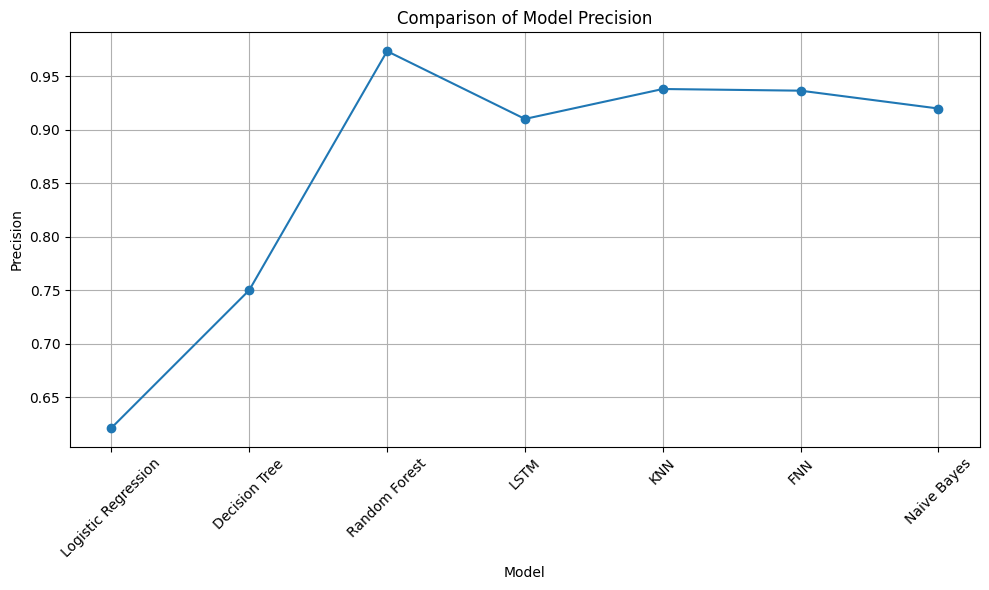

In [ ]:
import matplotlib.pyplot as plt

models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'LSTM', 'KNN', 'FNN', 'Naive Bayes']
accuracies = [precision_LR, precision_DT, precision_RF, precision_LSTM, precision_KNN, precision_FNN, precision_NB]

plt.figure(figsize=(10, 6))
plt.plot(models, accuracies, marker='o', linestyle='-')
plt.title('Comparison of Model Precision')
plt.xlabel('Model')
plt.ylabel('Precision')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

#**Comparing Recall for all implemented models on Imbalanced dataset**

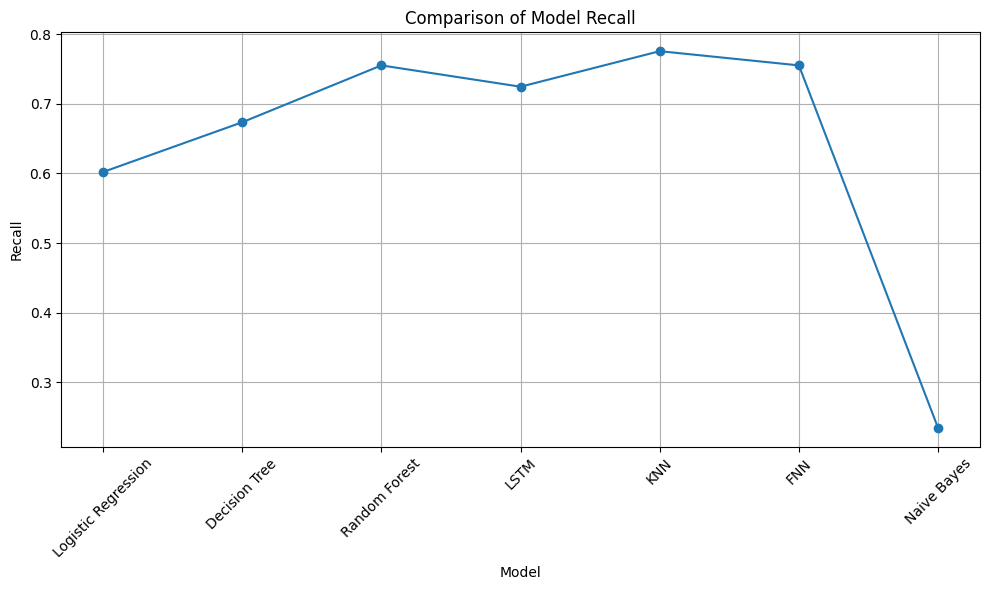

In [ ]:
import matplotlib.pyplot as plt

models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'LSTM', 'KNN', 'FNN', 'Naive Bayes']
accuracies = [recall_LR, recall_DT, recall_RF, recall_LSTM, recall_KNN, recall_FNN, recall_NB]

plt.figure(figsize=(10, 6))
plt.plot(models, accuracies, marker='o', linestyle='-')
plt.title('Comparison of Model Recall')
plt.xlabel('Model')
plt.ylabel('Recall')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

#**Comparing Area under Receiver Operating Characteristic (ROC) Curve for all implemented models on Imbalanced dataset**

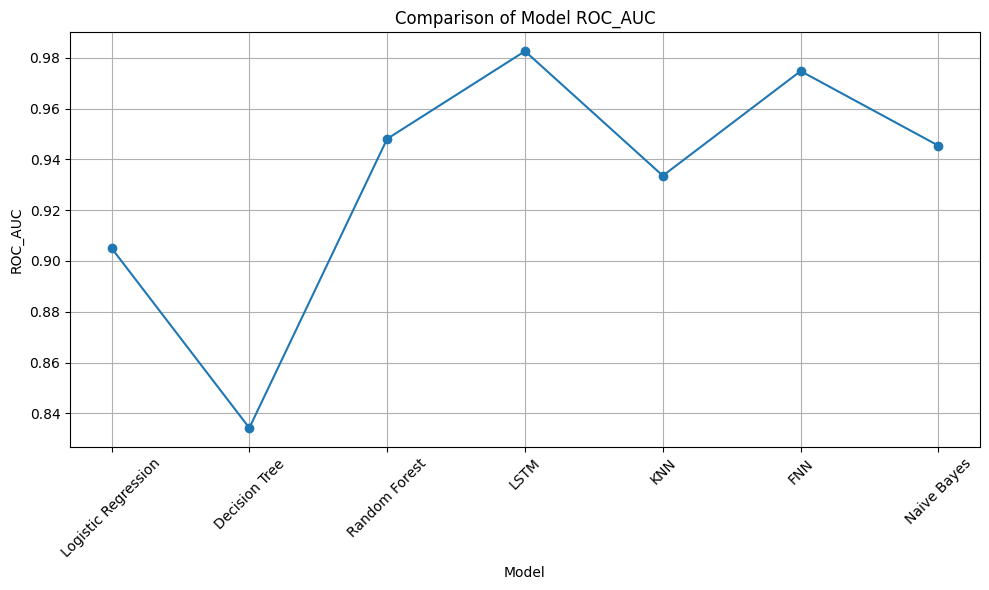

In [ ]:
import matplotlib.pyplot as plt

models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'LSTM', 'KNN', 'FNN', 'Naive Bayes']
accuracies = [roc_auc_LR, roc_auc_DT, roc_auc_RF, roc_auc_LSTM, roc_auc_KNN, roc_auc_FNN, roc_auc_NB]

plt.figure(figsize=(10, 6))
plt.plot(models, accuracies, marker='o', linestyle='-')
plt.title('Comparison of Model ROC_AUC')
plt.xlabel('Model')
plt.ylabel('ROC_AUC')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

#**Balanced Dataset**

In [ ]:
X = balanced_df.drop(columns=['class'])
y = balanced_df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#**Naive Bayes**

In [ ]:
params = {'var_smoothing': np.logspace(0, -9, num=100)}
nb_classifier = GaussianNB()
grid_search = GridSearchCV(nb_classifier, params, cv=5, verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

best_nb_classifier = grid_search.best_estimator_

y_pred = best_nb_classifier.predict(X_test)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


Accuracy: 0.8686404164395125


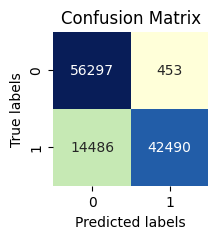

F1 Score: 0.8504888960057647
Precision: 0.9894511328970962
Recall: 0.745752597584948

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.99      0.88     56750
           1       0.99      0.75      0.85     56976

    accuracy                           0.87    113726
   macro avg       0.89      0.87      0.87    113726
weighted avg       0.89      0.87      0.87    113726



In [ ]:
accuracy_NB = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_NB)

conf_matrix_NB = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(2, 2))
sns.heatmap(conf_matrix_NB, annot=True, cmap="YlGnBu", fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

f1_NB = f1_score(y_test, y_pred)
print("F1 Score:", f1_NB)

precision_NB = precision_score(y_test, y_pred)
print("Precision:", precision_NB)

recall_NB = recall_score(y_test, y_pred)
print("Recall:", recall_NB)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

ROC_AUC: 0.982717349727283


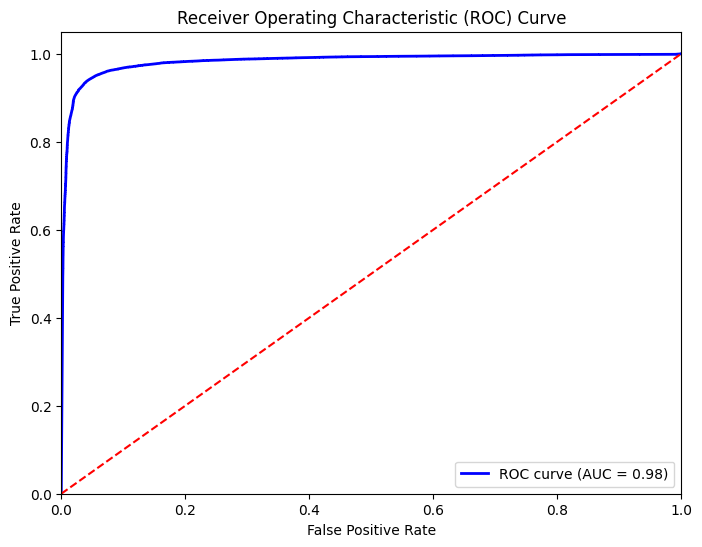

In [ ]:
y_prob = best_nb_classifier.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc_NB = auc(fpr, tpr)

print("ROC_AUC:", roc_auc_NB)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_NB)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

#**Logistic Regression**

In [ ]:
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100]
}

logreg = LogisticRegression()

grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

grid_search.fit(X_train, y_train)

best_logreg = grid_search.best_estimator_

y_pred = best_logreg.predict(X_test)

print("\nBest Hyperparameters:", grid_search.best_params_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solve


Best Hyperparameters: {'C': 0.01, 'penalty': 'l2'}


Accuracy: 0.9721259870214375


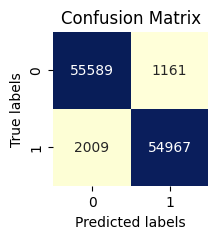

F1 Score: 0.9719726976941576
Precision: 0.9793151368301026
Recall: 0.9647395394552092

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97     56750
           1       0.98      0.96      0.97     56976

    accuracy                           0.97    113726
   macro avg       0.97      0.97      0.97    113726
weighted avg       0.97      0.97      0.97    113726



In [ ]:
accuracy_LR = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_LR)

conf_matrix_LR = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(2, 2))
sns.heatmap(conf_matrix_LR, annot=True, cmap="YlGnBu", fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

f1_LR = f1_score(y_test, y_pred)
print("F1 Score:", f1_LR)

precision_LR = precision_score(y_test, y_pred)
print("Precision:", precision_LR)

recall_LR = recall_score(y_test, y_pred)
print("Recall:", recall_LR)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

ROC_AUC: 0.9934243790104991


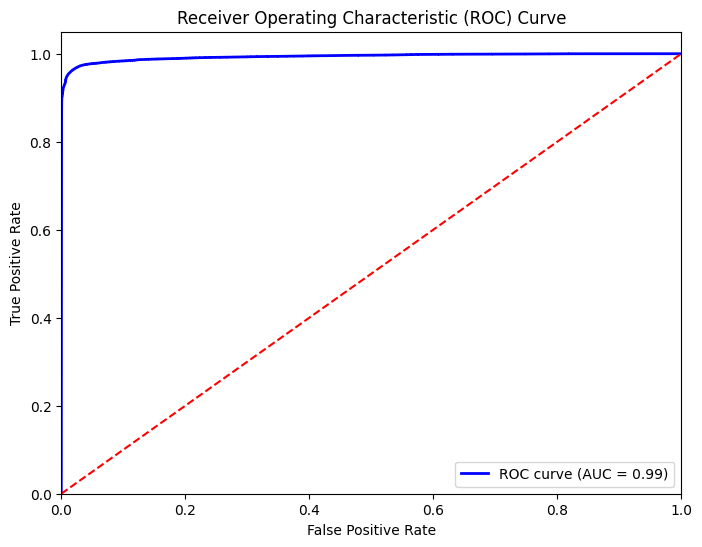

In [ ]:
y_prob = best_logreg.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc_LR = auc(fpr, tpr)

print("ROC_AUC:", roc_auc_LR)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_LR)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

#**Decision Tree**

In [ ]:
clf = DecisionTreeClassifier(max_depth=15, max_features='auto', criterion='entropy', random_state=42)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


Accuracy: 0.9961662240824438


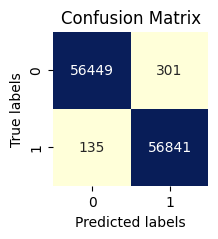

F1 Score: 0.9961793932596085
Precision: 0.9947324209863148
Recall: 0.9976305812973884

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56750
           1       0.99      1.00      1.00     56976

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



In [ ]:
accuracy_DT = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_DT)

conf_matrix_DT = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(2, 2))
sns.heatmap(conf_matrix_DT, annot=True, cmap="YlGnBu", fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

f1_DT = f1_score(y_test, y_pred)
print("F1 Score:", f1_DT)

precision_DT = precision_score(y_test, y_pred)
print("Precision:", precision_DT)

recall_DT = recall_score(y_test, y_pred)
print("Recall:", recall_DT)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

ROC_AUC: 0.9988852839498382


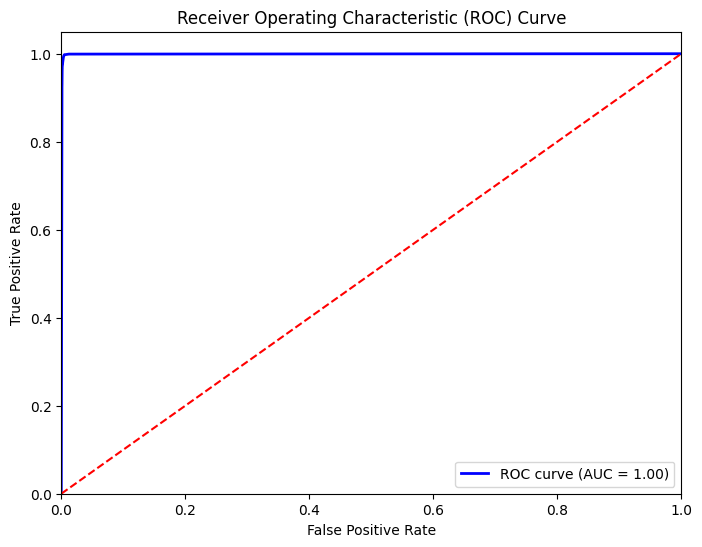

In [ ]:
y_prob = clf.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc_DT = auc(fpr, tpr)

print("ROC_AUC:", roc_auc_DT)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_DT)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

#**Random Forest**

In [ ]:
clf = RandomForestClassifier(n_estimators=50, random_state=42)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

Accuracy: 0.999903276295658


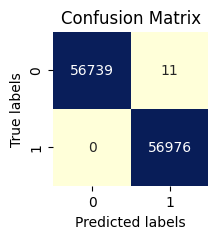

F1 Score: 0.9999034774444338
Precision: 0.9998069735202766
Recall: 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56750
           1       1.00      1.00      1.00     56976

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



In [ ]:
accuracy_RF = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_RF)

conf_matrix_RF = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(2, 2))
sns.heatmap(conf_matrix_RF, annot=True, cmap="YlGnBu", fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

f1_RF = f1_score(y_test, y_pred)
print("F1 Score:", f1_RF)

precision_RF = precision_score(y_test, y_pred)
print("Precision:", precision_RF)

recall_RF = recall_score(y_test, y_pred)
print("Recall:", recall_RF)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

ROC_AUC: 0.9999902006811431


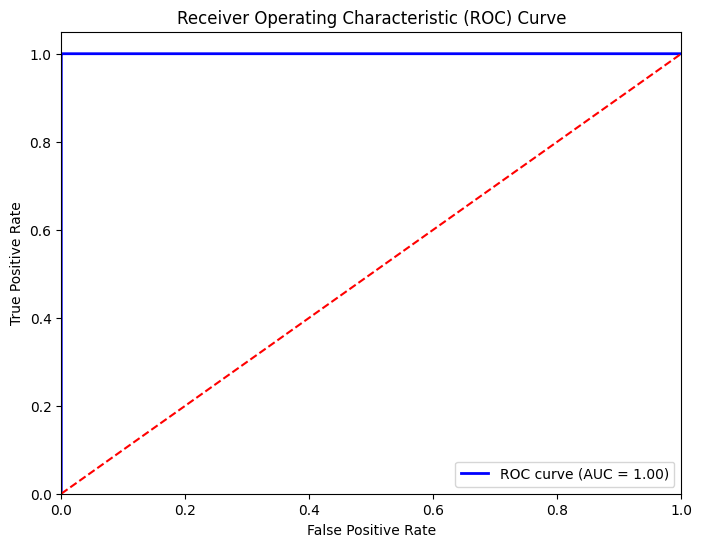

In [ ]:
y_prob = clf.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc_RF = auc(fpr, tpr)

print("ROC_AUC:", roc_auc_RF)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_RF)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

#**Long Short-Term Memory Networks (LSTM)**

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

timesteps = 1
X_train_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0], timesteps, X_train_scaled.shape[1])
X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], timesteps, X_test_scaled.shape[1])

model = Sequential()
model.add(LSTM(units=64, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(units=1, activation='sigmoid'))

optimizer = Adam(lr=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train_reshaped, y_train, epochs=10, batch_size=64, validation_split=0.2)


y_pred_proba = model.predict(X_test_reshaped)
y_pred = (y_pred_proba > 0.5).astype(int)

Epoch 1/10
5687/5687 [==============================] - 36s 6ms/step - loss: 0.0614 - accuracy: 0.9778 - val_loss: 0.0285 - val_accuracy: 0.9887
Epoch 2/10
5687/5687 [==============================] - 37s 6ms/step - loss: 0.0237 - accuracy: 0.9917 - val_loss: 0.0154 - val_accuracy: 0.9947
Epoch 3/10
5687/5687 [==============================] - 24s 4ms/step - loss: 0.0157 - accuracy: 0.9948 - val_loss: 0.0102 - val_accuracy: 0.9968
Epoch 4/10
5687/5687 [==============================] - 22s 4ms/step - loss: 0.0116 - accuracy: 0.9961 - val_loss: 0.0070 - val_accuracy: 0.9983
Epoch 5/10
5687/5687 [==============================] - 29s 5ms/step - loss: 0.0089 - accuracy: 0.9972 - val_loss: 0.0054 - val_accuracy: 0.9986
Epoch 6/10
5687/5687 [==============================] - 24s 4ms/step - loss: 0.0073 - accuracy: 0.9978 - val_loss: 0.0040 - val_accuracy: 0.9990
Epoch 7/10
5687/5687 [==============================] - 26s 5ms/step - loss: 0.0060 - accuracy: 0.9981 - val_loss: 0.0033 - val_ac

Accuracy: 0.9994108647099168


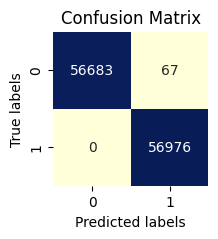

F1 Score: 0.999412378638648
Precision: 0.9988254474694529
Recall: 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56750
           1       1.00      1.00      1.00     56976

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



In [ ]:
accuracy_LSTM = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_LSTM)

conf_matrix_LSTM = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(2, 2))
sns.heatmap(conf_matrix_LSTM, annot=True, cmap="YlGnBu", fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

f1_LSTM = f1_score(y_test, y_pred)
print("F1 Score:", f1_LSTM)

precision_LSTM = precision_score(y_test, y_pred)
print("Precision:", precision_LSTM)

recall_LSTM = recall_score(y_test, y_pred)
print("Recall:", recall_LSTM)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

AUC-ROC: 0.999976808536433


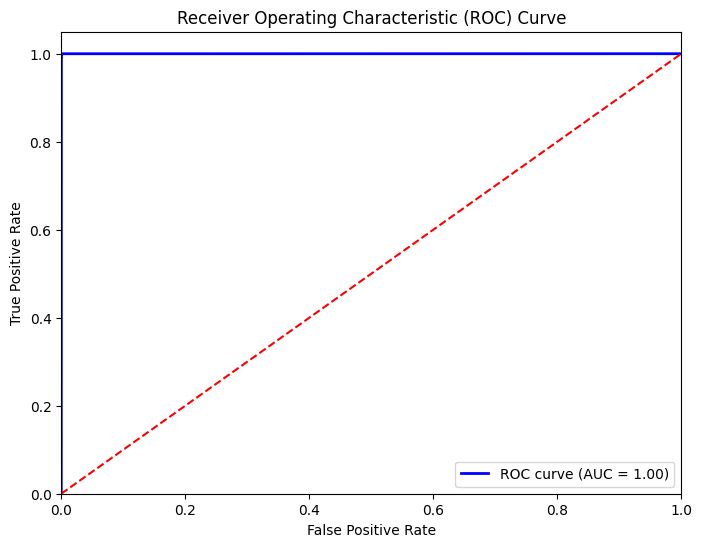

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculating AUC-ROC
roc_auc_LSTM = auc(fpr, tpr)
print("AUC-ROC:", roc_auc_LSTM)

# Plotting ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_LSTM)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

#**KNN**

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train_scaled, y_train)

y_pred = knn.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9990943144047975

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56750
           1       1.00      1.00      1.00     56976

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



Accuracy: 0.9990943144047975


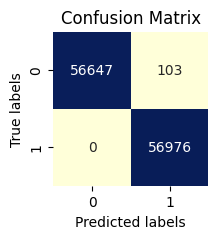

F1 Score: 0.9990969269212222
Precision: 0.9981954834527584
Recall: 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56750
           1       1.00      1.00      1.00     56976

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



In [ ]:
accuracy_KNN = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_KNN)

conf_matrix_KNN = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(2, 2))
sns.heatmap(conf_matrix_KNN, annot=True, cmap="YlGnBu", fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

f1_KNN = f1_score(y_test, y_pred)
print("F1 Score:", f1_KNN)

precision_KNN = precision_score(y_test, y_pred)
print("Precision:", precision_KNN)

recall_KNN = recall_score(y_test, y_pred)
print("Recall:", recall_KNN)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

AUC-ROC: 0.9997092511013216


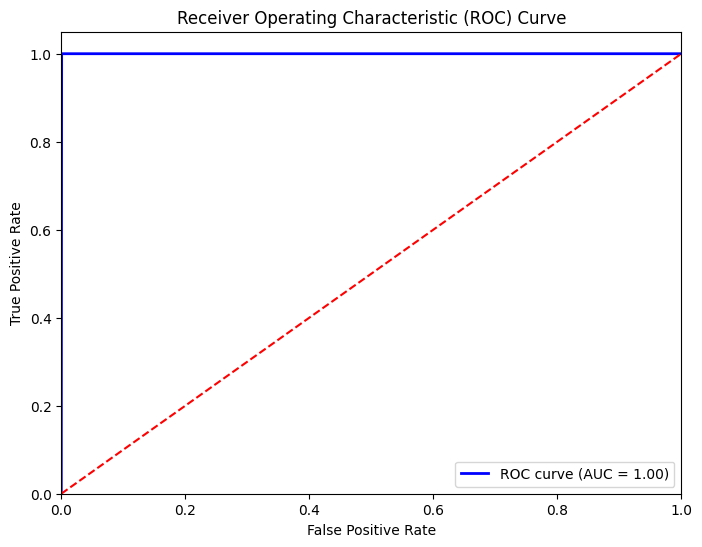

In [ ]:
y_pred_proba = knn.predict_proba(X_test_scaled)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

roc_auc_KNN = auc(fpr, tpr)
print("AUC-ROC:", roc_auc_KNN)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_KNN)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


#**FNN**

AUC-ROC: 0.9997092511013216


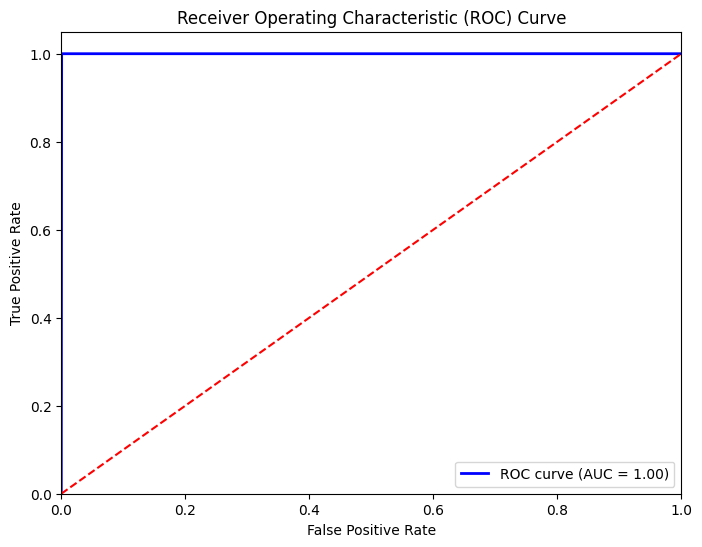

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculating AUC-ROC
roc_auc_FNN = auc(fpr, tpr)
print("AUC-ROC:", roc_auc_FNN)

# Plotting ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_FNN)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Accuracy: 0.9990943144047975


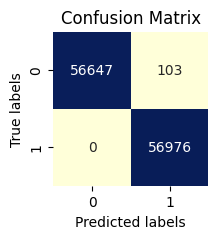

F1 Score: 0.9990969269212222
Precision: 0.9981954834527584
Recall: 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56750
           1       1.00      1.00      1.00     56976

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



In [ ]:
accuracy_FNN = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_FNN)

conf_matrix_FNN = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(2, 2))
sns.heatmap(conf_matrix_FNN, annot=True, cmap="YlGnBu", fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

f1_FNN = f1_score(y_test, y_pred)
print("F1 Score:", f1_FNN)

precision_FNN = precision_score(y_test, y_pred)
print("Precision:", precision_FNN)

recall_FNN = recall_score(y_test, y_pred)
print("Recall:", recall_FNN)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

AUC-ROC: 0.9997092511013216


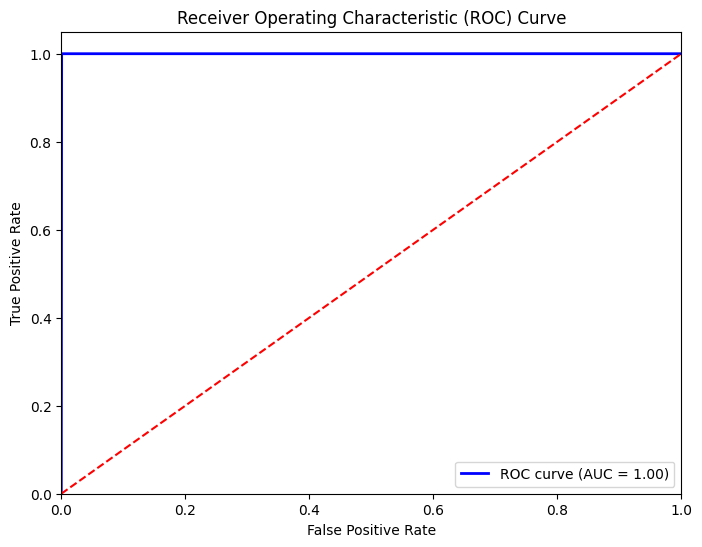

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculating AUC-ROC
roc_auc_FNN = auc(fpr, tpr)
print("AUC-ROC:", roc_auc_FNN)

# Plotting ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_FNN)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


#**Comparing Accuracy for all implemented models on balanced dataset**

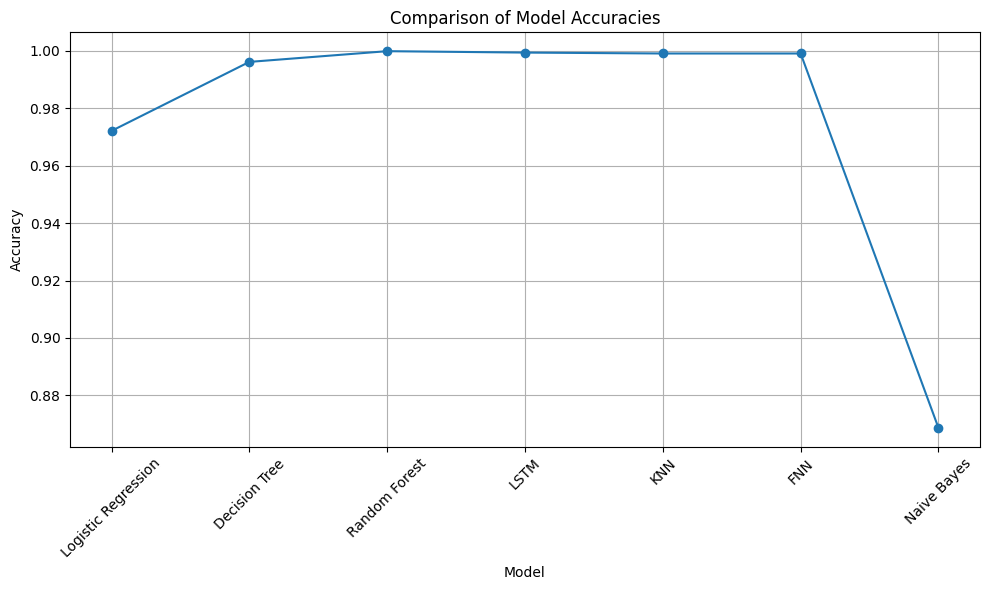

In [ ]:
import matplotlib.pyplot as plt

models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'LSTM', 'KNN', 'FNN', 'Naive Bayes']
accuracies = [accuracy_LR, accuracy_DT, accuracy_RF, accuracy_LSTM, accuracy_KNN, accuracy_FNN, accuracy_NB]

plt.figure(figsize=(10, 6))
plt.plot(models, accuracies, marker='o', linestyle='-')
plt.title('Comparison of Model Accuracies')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

#**Comparing F1 - Score for all implemented models on balanced dataset**

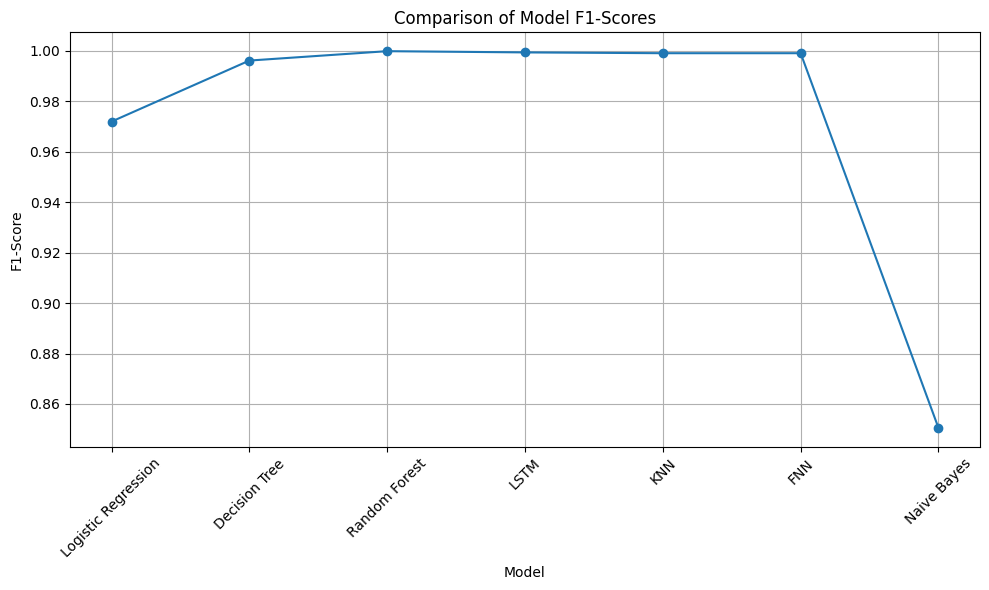

In [ ]:
import matplotlib.pyplot as plt

models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'LSTM', 'KNN', 'FNN', 'Naive Bayes']
accuracies = [f1_LR, f1_DT, f1_RF, f1_LSTM, f1_KNN, f1_FNN, f1_NB]

plt.figure(figsize=(10, 6))
plt.plot(models, accuracies, marker='o', linestyle='-')
plt.title('Comparison of Model F1-Scores')
plt.xlabel('Model')
plt.ylabel('F1-Score')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

#**Comparing Precision for all implemented models on balanced dataset**

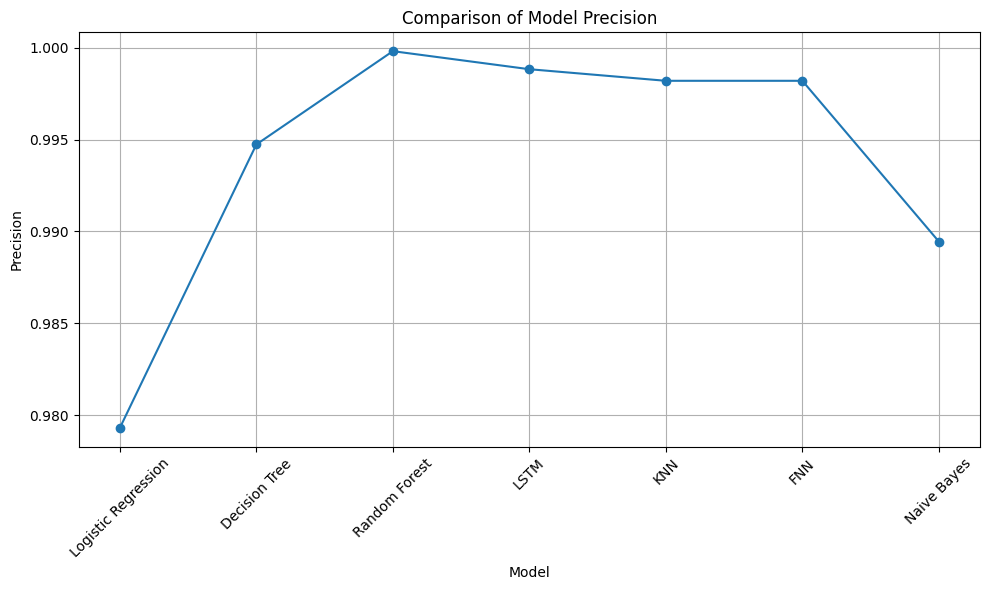

In [ ]:
import matplotlib.pyplot as plt

models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'LSTM', 'KNN', 'FNN', 'Naive Bayes']
accuracies = [precision_LR, precision_DT, precision_RF, precision_LSTM, precision_KNN, precision_FNN, precision_NB]

plt.figure(figsize=(10, 6))
plt.plot(models, accuracies, marker='o', linestyle='-')
plt.title('Comparison of Model Precision')
plt.xlabel('Model')
plt.ylabel('Precision')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

#**Comparing Recall for all implemented models on balanced dataset**

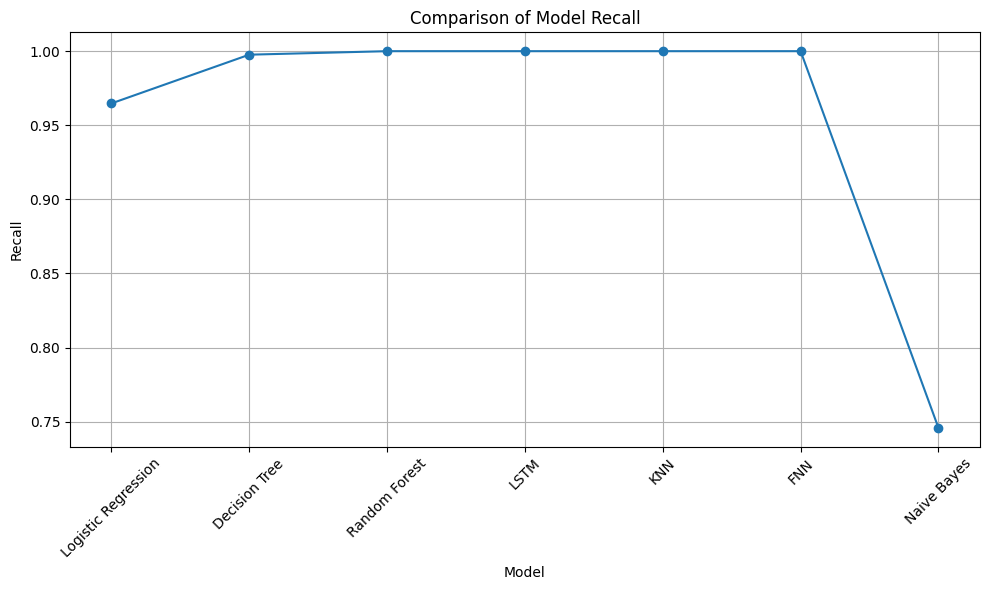

In [ ]:
import matplotlib.pyplot as plt

models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'LSTM', 'KNN', 'FNN', 'Naive Bayes']
accuracies = [recall_LR, recall_DT, recall_RF, recall_LSTM, recall_KNN, recall_FNN, recall_NB]

plt.figure(figsize=(10, 6))
plt.plot(models, accuracies, marker='o', linestyle='-')
plt.title('Comparison of Model Recall')
plt.xlabel('Model')
plt.ylabel('Recall')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

#**Comparing Area under Receiver Operating Characteristic (ROC) Curve for all implemented models on balanced dataset**

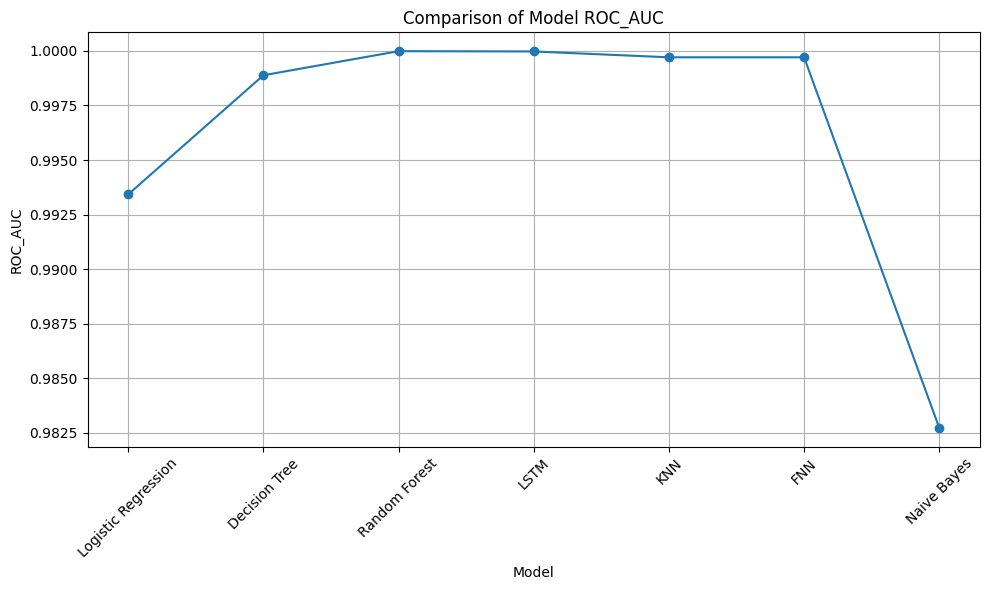

In [ ]:
import matplotlib.pyplot as plt

models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'LSTM', 'KNN', 'FNN', 'Naive Bayes']
accuracies = [roc_auc_LR, roc_auc_DT, roc_auc_RF, roc_auc_LSTM, roc_auc_KNN, roc_auc_FNN, roc_auc_NB]

plt.figure(figsize=(10, 6))
plt.plot(models, accuracies, marker='o', linestyle='-')
plt.title('Comparison of Model ROC_AUC')
plt.xlabel('Model')
plt.ylabel('ROC_AUC')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()